In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
plt.style.use(['fivethirtyeight'])
sns.set(font_scale = 1)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
np.random.seed(42)

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
import pandas as pd
data = pd.read_csv("CC GENERAL.csv")
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
display(data.shape, data.head(5))


(8950, 18)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
data_info = pd.DataFrame(columns=['Name of Col', 'Num of Null', 'Dtype', 'N_Unique'])

for i in range(0, len(data.columns)):
    data_info.loc[i] = [data.columns[i],
                        data[data.columns[i]].isnull().sum(),
                        data[data.columns[i]].dtypes,
                        data[data.columns[i]].nunique()]

data_info

Name of Col  Num of Null    Dtype  N_Unique
0                            CUST_ID            0   object      8950
1                            BALANCE            0  float64      8871
2                  BALANCE_FREQUENCY            0  float64        43
3                          PURCHASES            0  float64      6203
4                   ONEOFF_PURCHASES            0  float64      4014
5             INSTALLMENTS_PURCHASES            0  float64      4452
6                       CASH_ADVANCE            0  float64      4323
7                PURCHASES_FREQUENCY            0  float64        47
8         ONEOFF_PURCHASES_FREQUENCY            0  float64        47
9   PURCHASES_INSTALLMENTS_FREQUENCY            0  float64        47
10            CASH_ADVANCE_FREQUENCY            0  float64        54
11                  CASH_ADVANCE_TRX            0    int64        65
12                     PURCHASES_TRX            0    int64       173
13                      CREDIT_LIMIT            1  float64       205
14                          PAYMENTS            0  float64      8711
15                  MINIMUM_PAYMENTS          313  float64      8636
16                  PRC_FULL_PAYMENT            0  float64        47
17                            TENURE            0    int64         7

In [ ]:
data.drop(columns='CUST_ID', inplace=True)

data['MINIMUM_PAYMENTS'].fillna( data['MINIMUM_PAYMENTS'].median(), inplace = True )
data.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

In [ ]:
data.isnull().sum().sort_values(ascending=False).head()

BALANCE                   0
CASH_ADVANCE_FREQUENCY    0
PRC_FULL_PAYMENT          0
MINIMUM_PAYMENTS          0
PAYMENTS                  0
dtype: int64

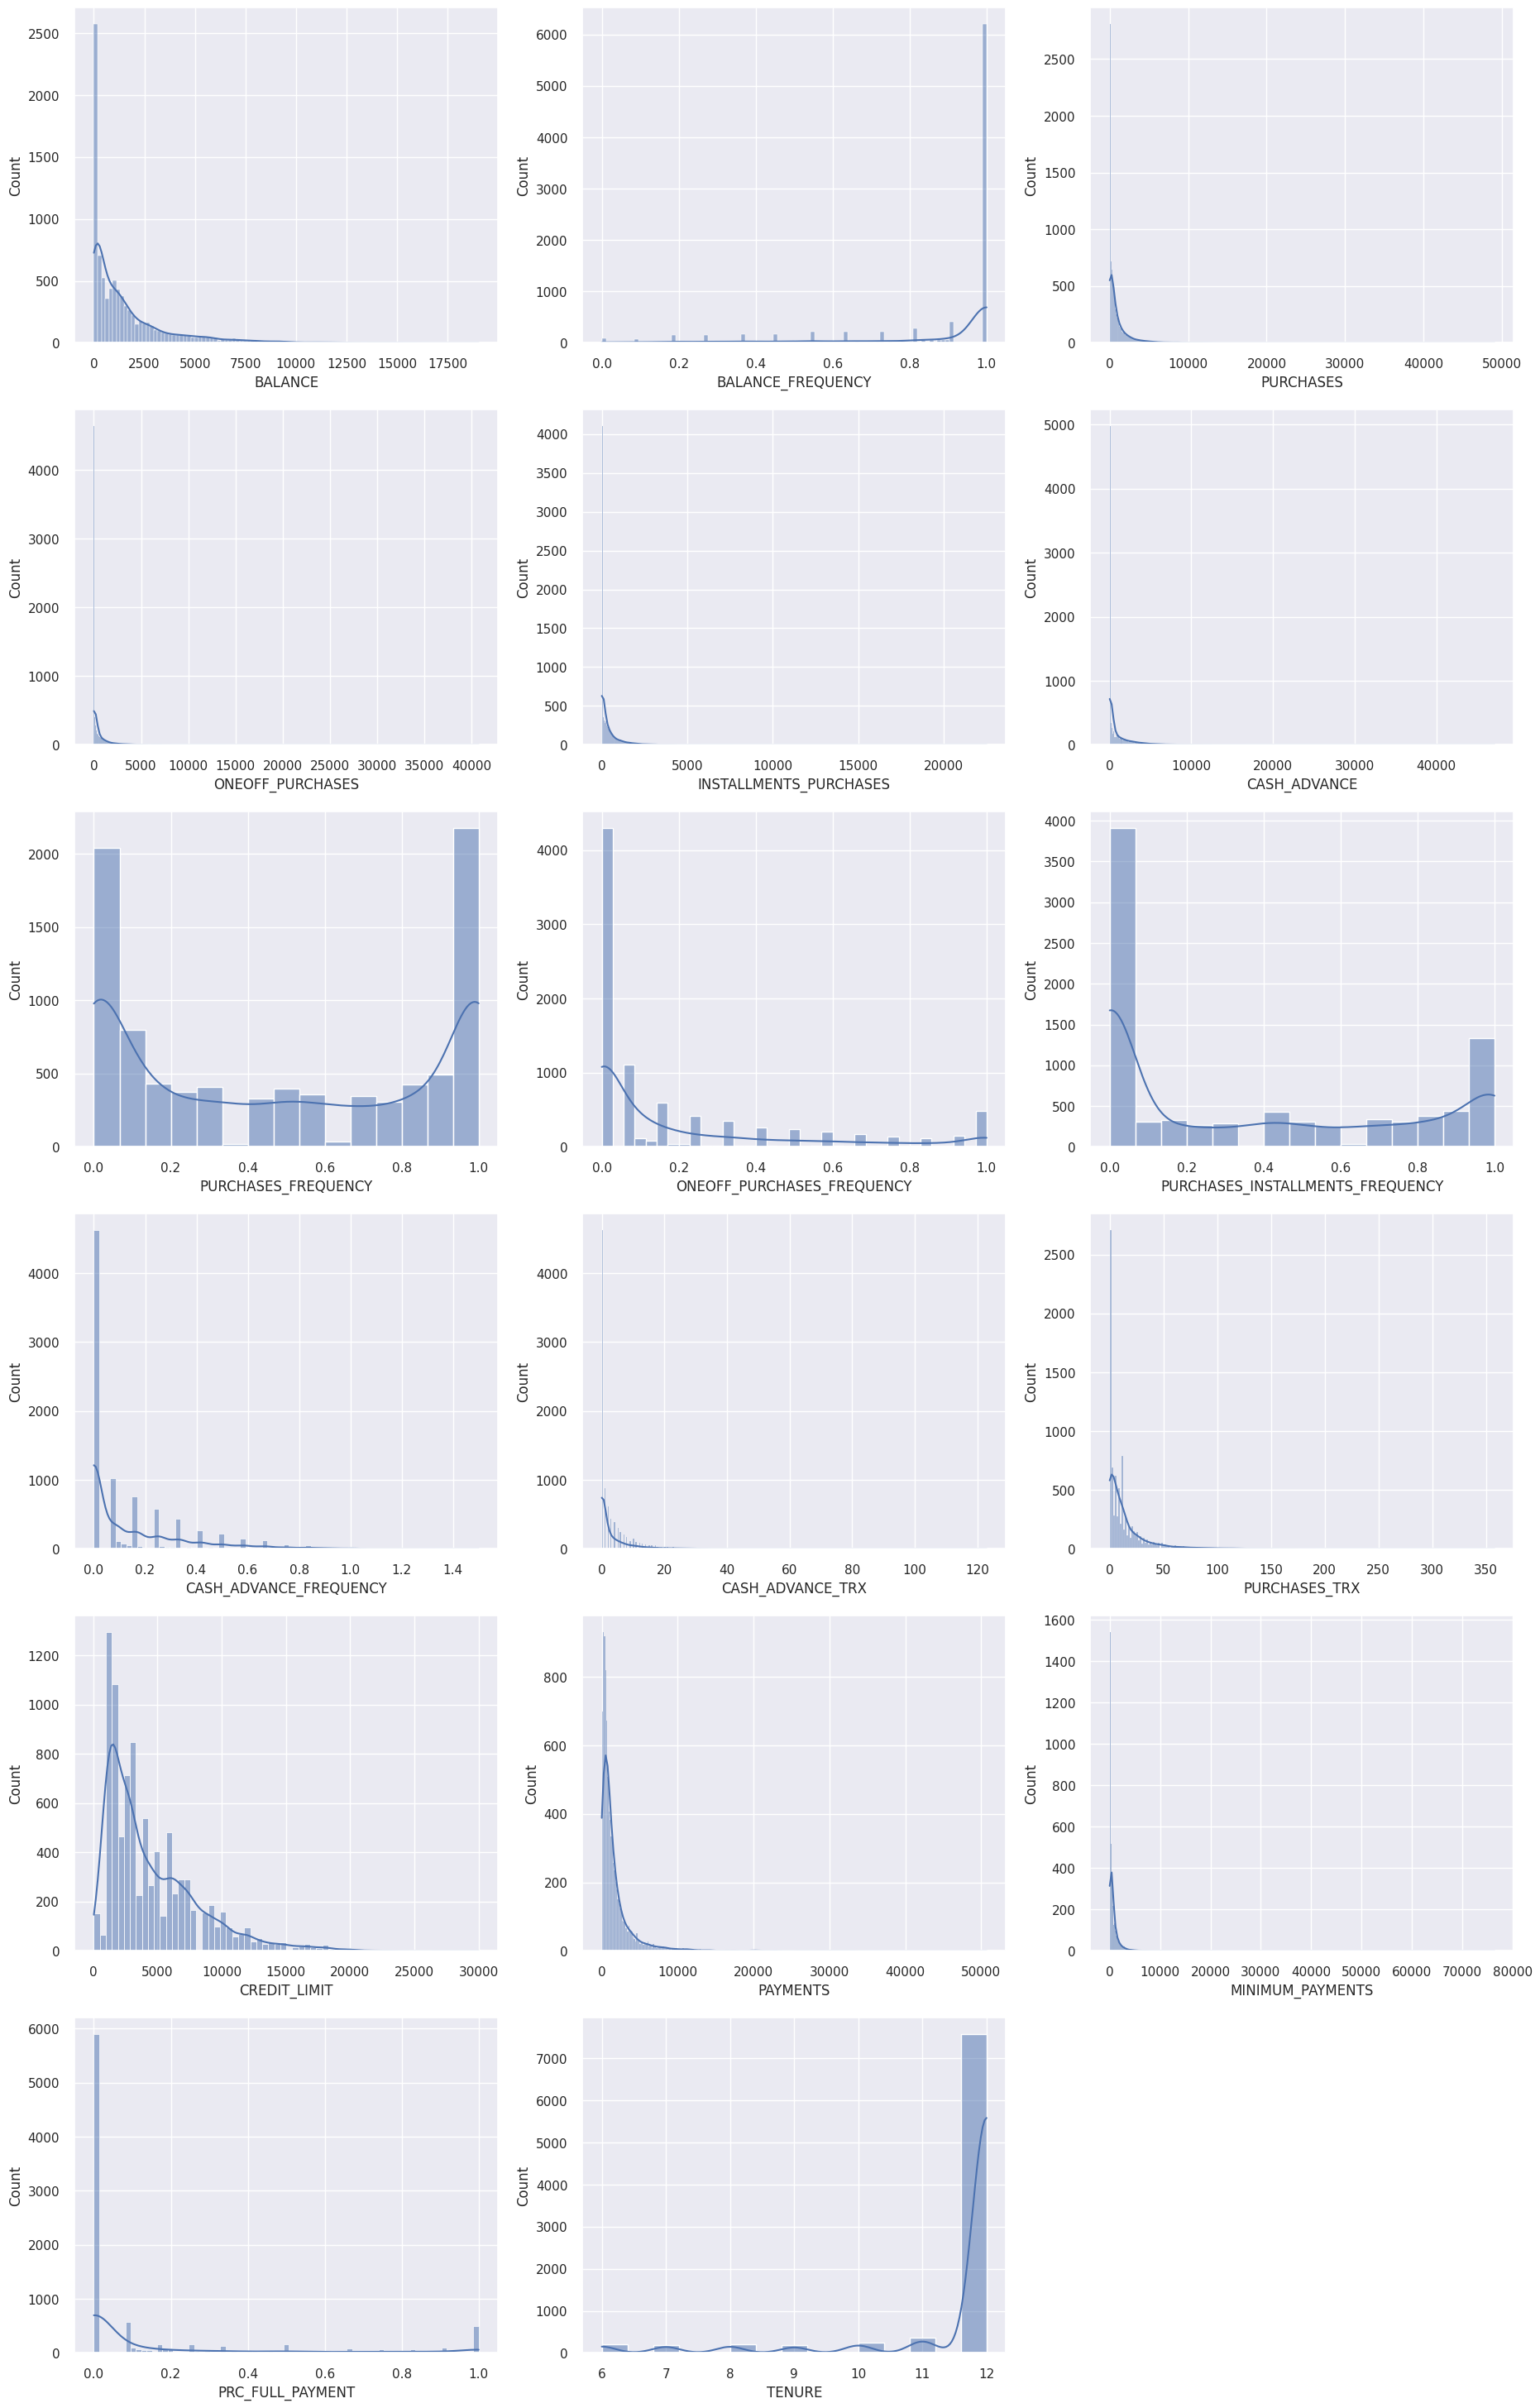

In [ ]:
plt.figure(figsize=(20,35))

for i, col in enumerate(data.columns):

        ax = plt.subplot(6, 3, i+1)

        sns.histplot(data[col] , ax=ax , kde=True)

        plt.xlabel(col)

plt.show()

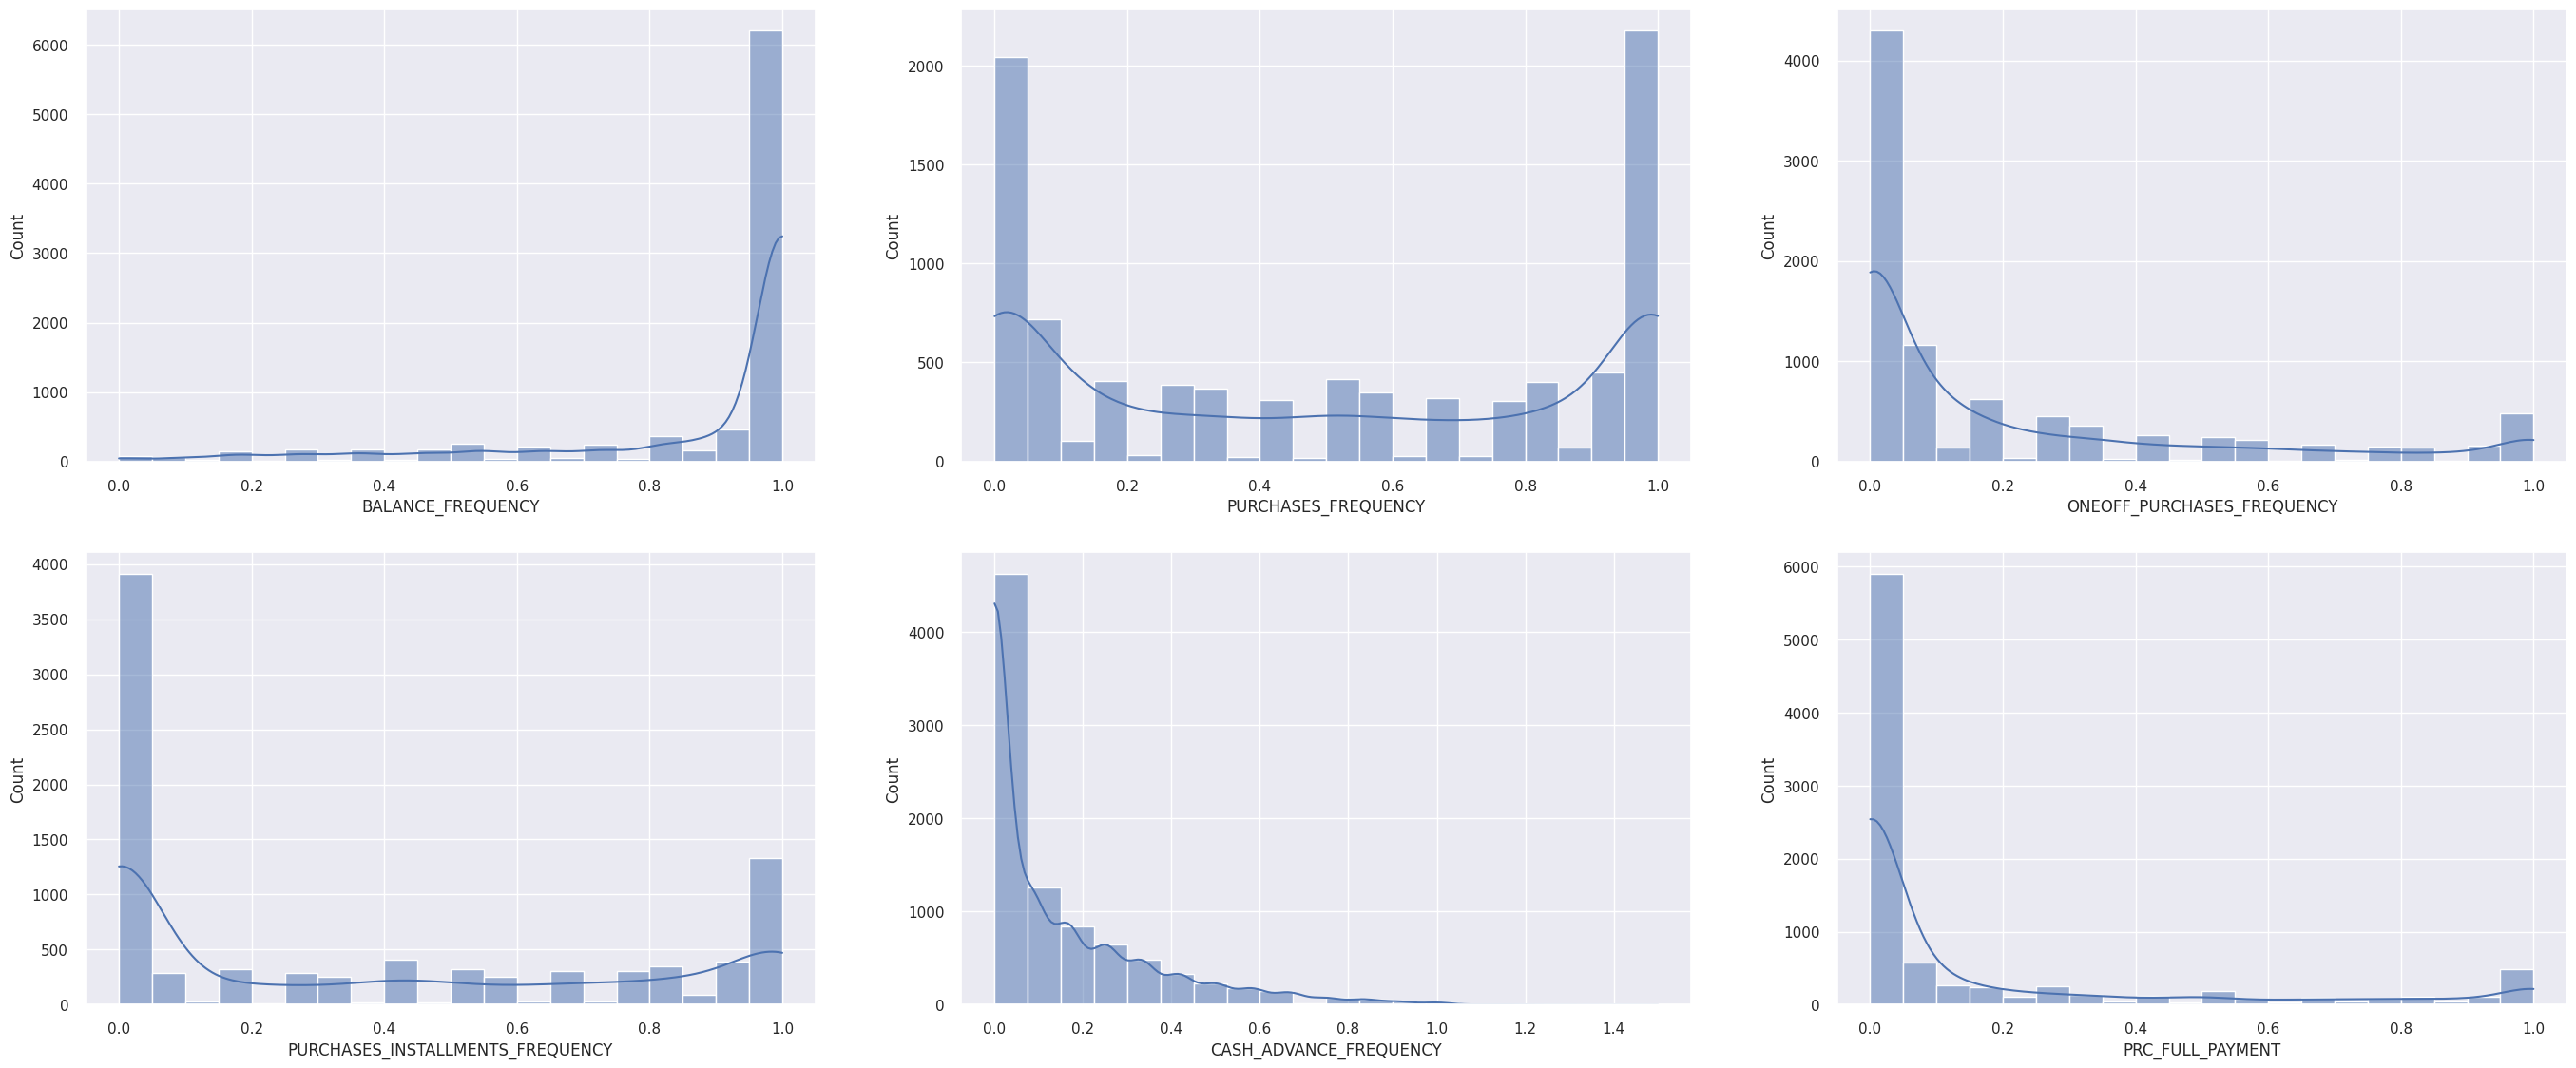

In [ ]:
Freq_Cols = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
             'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']

plt.figure(figsize=(30,20))

for i, col in enumerate(data[Freq_Cols]):

        ax = plt.subplot(3, 3, i+1)

        sns.histplot(data[col] , ax=ax , kde=True, bins=20)

        plt.xlabel(col)

plt.show()

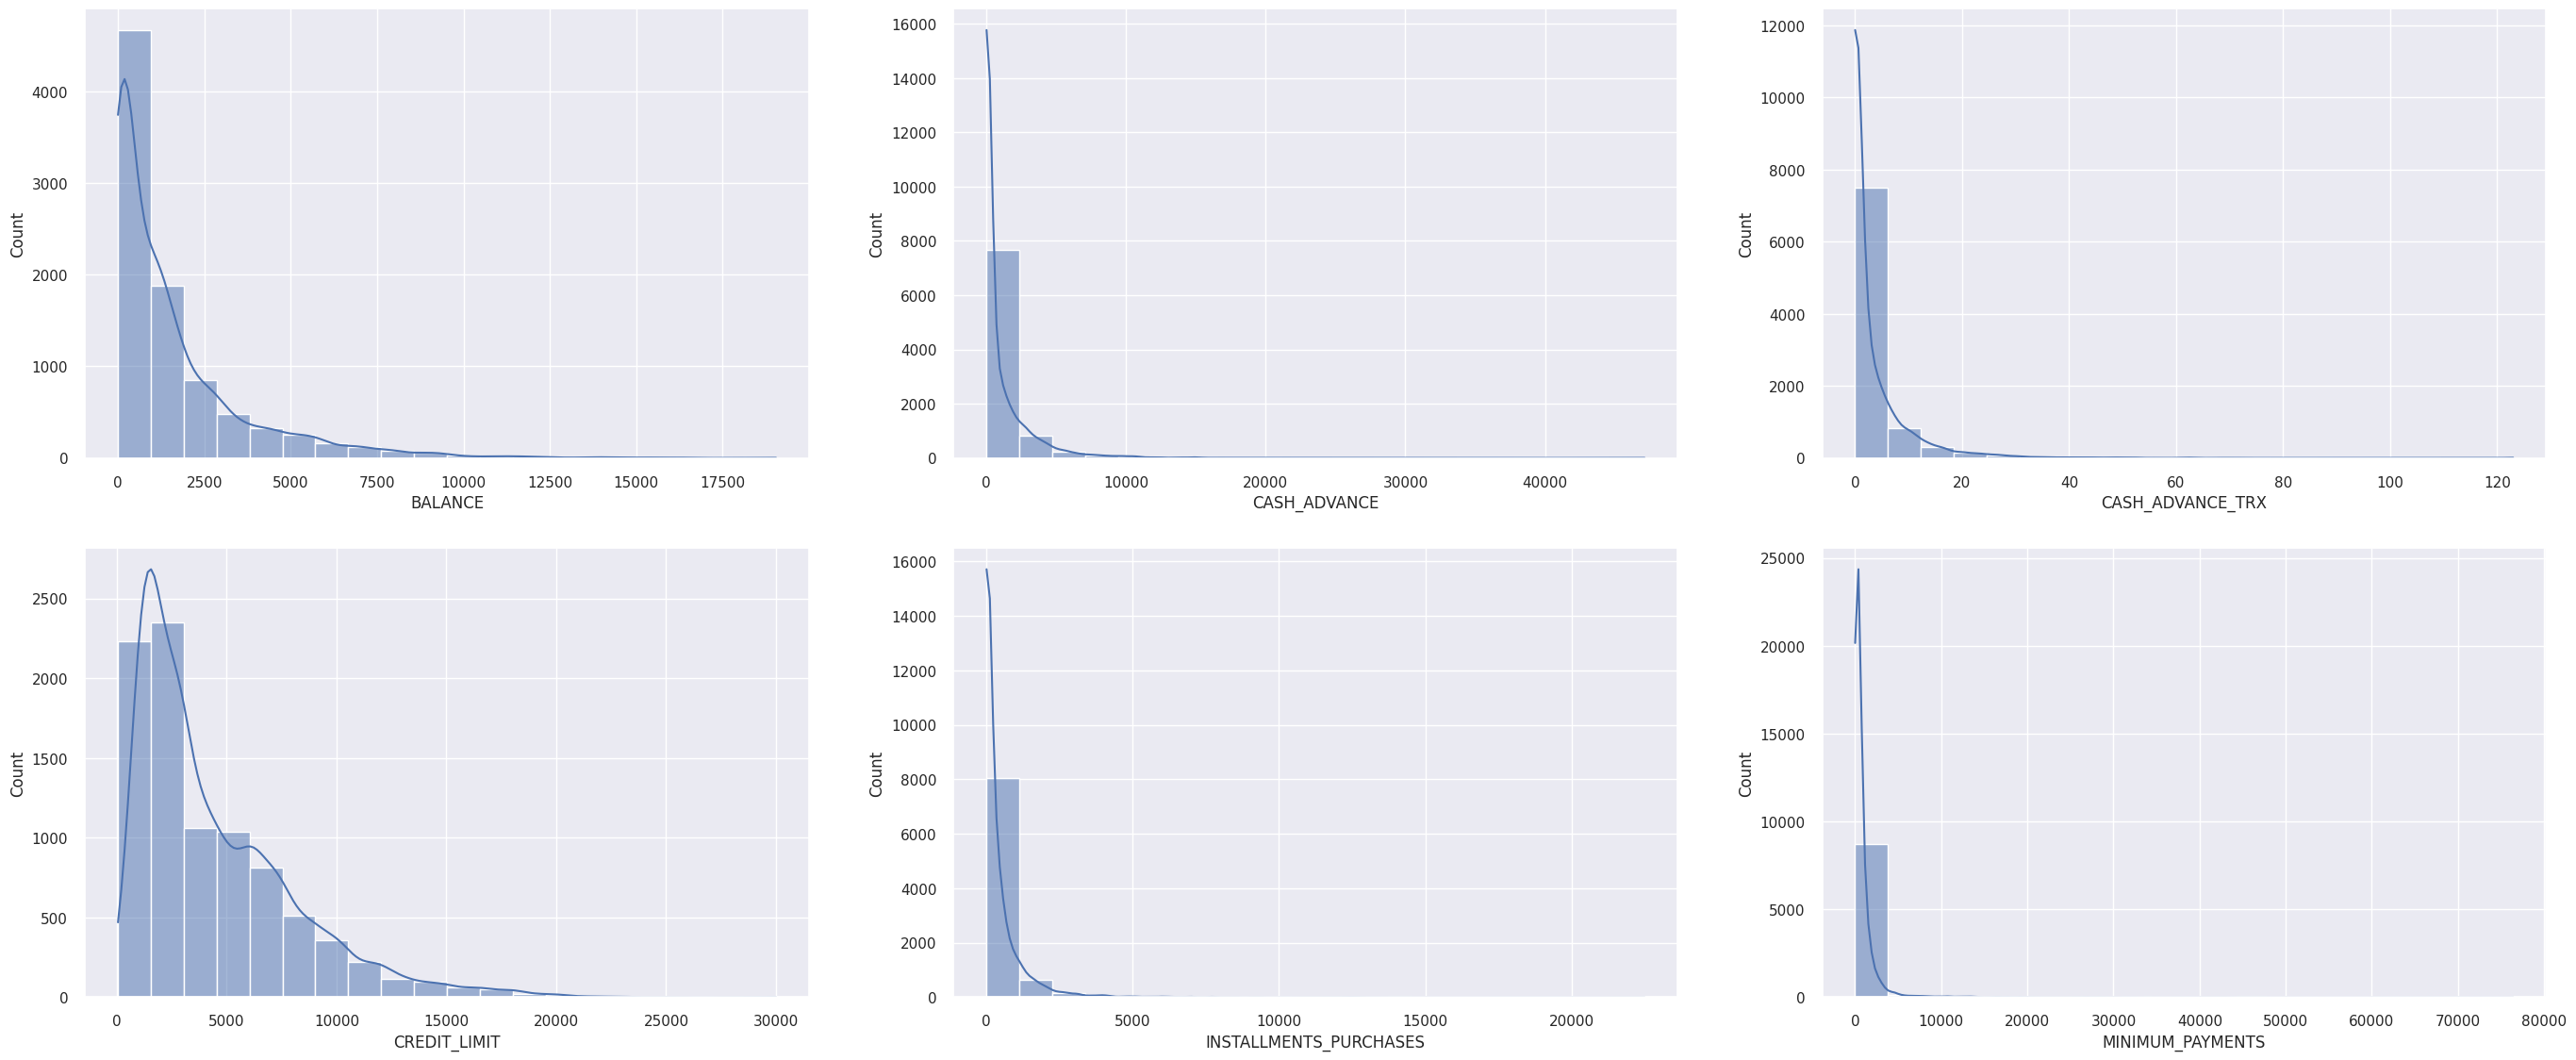

In [ ]:
plt.figure(figsize=(30,20))

for i, col in enumerate(data.columns.difference(Freq_Cols)[:6]):

        ax = plt.subplot(3, 3, i+1)

        sns.histplot(data[col] , ax=ax , kde=True, bins=20)

        plt.xlabel(col)

plt.show()

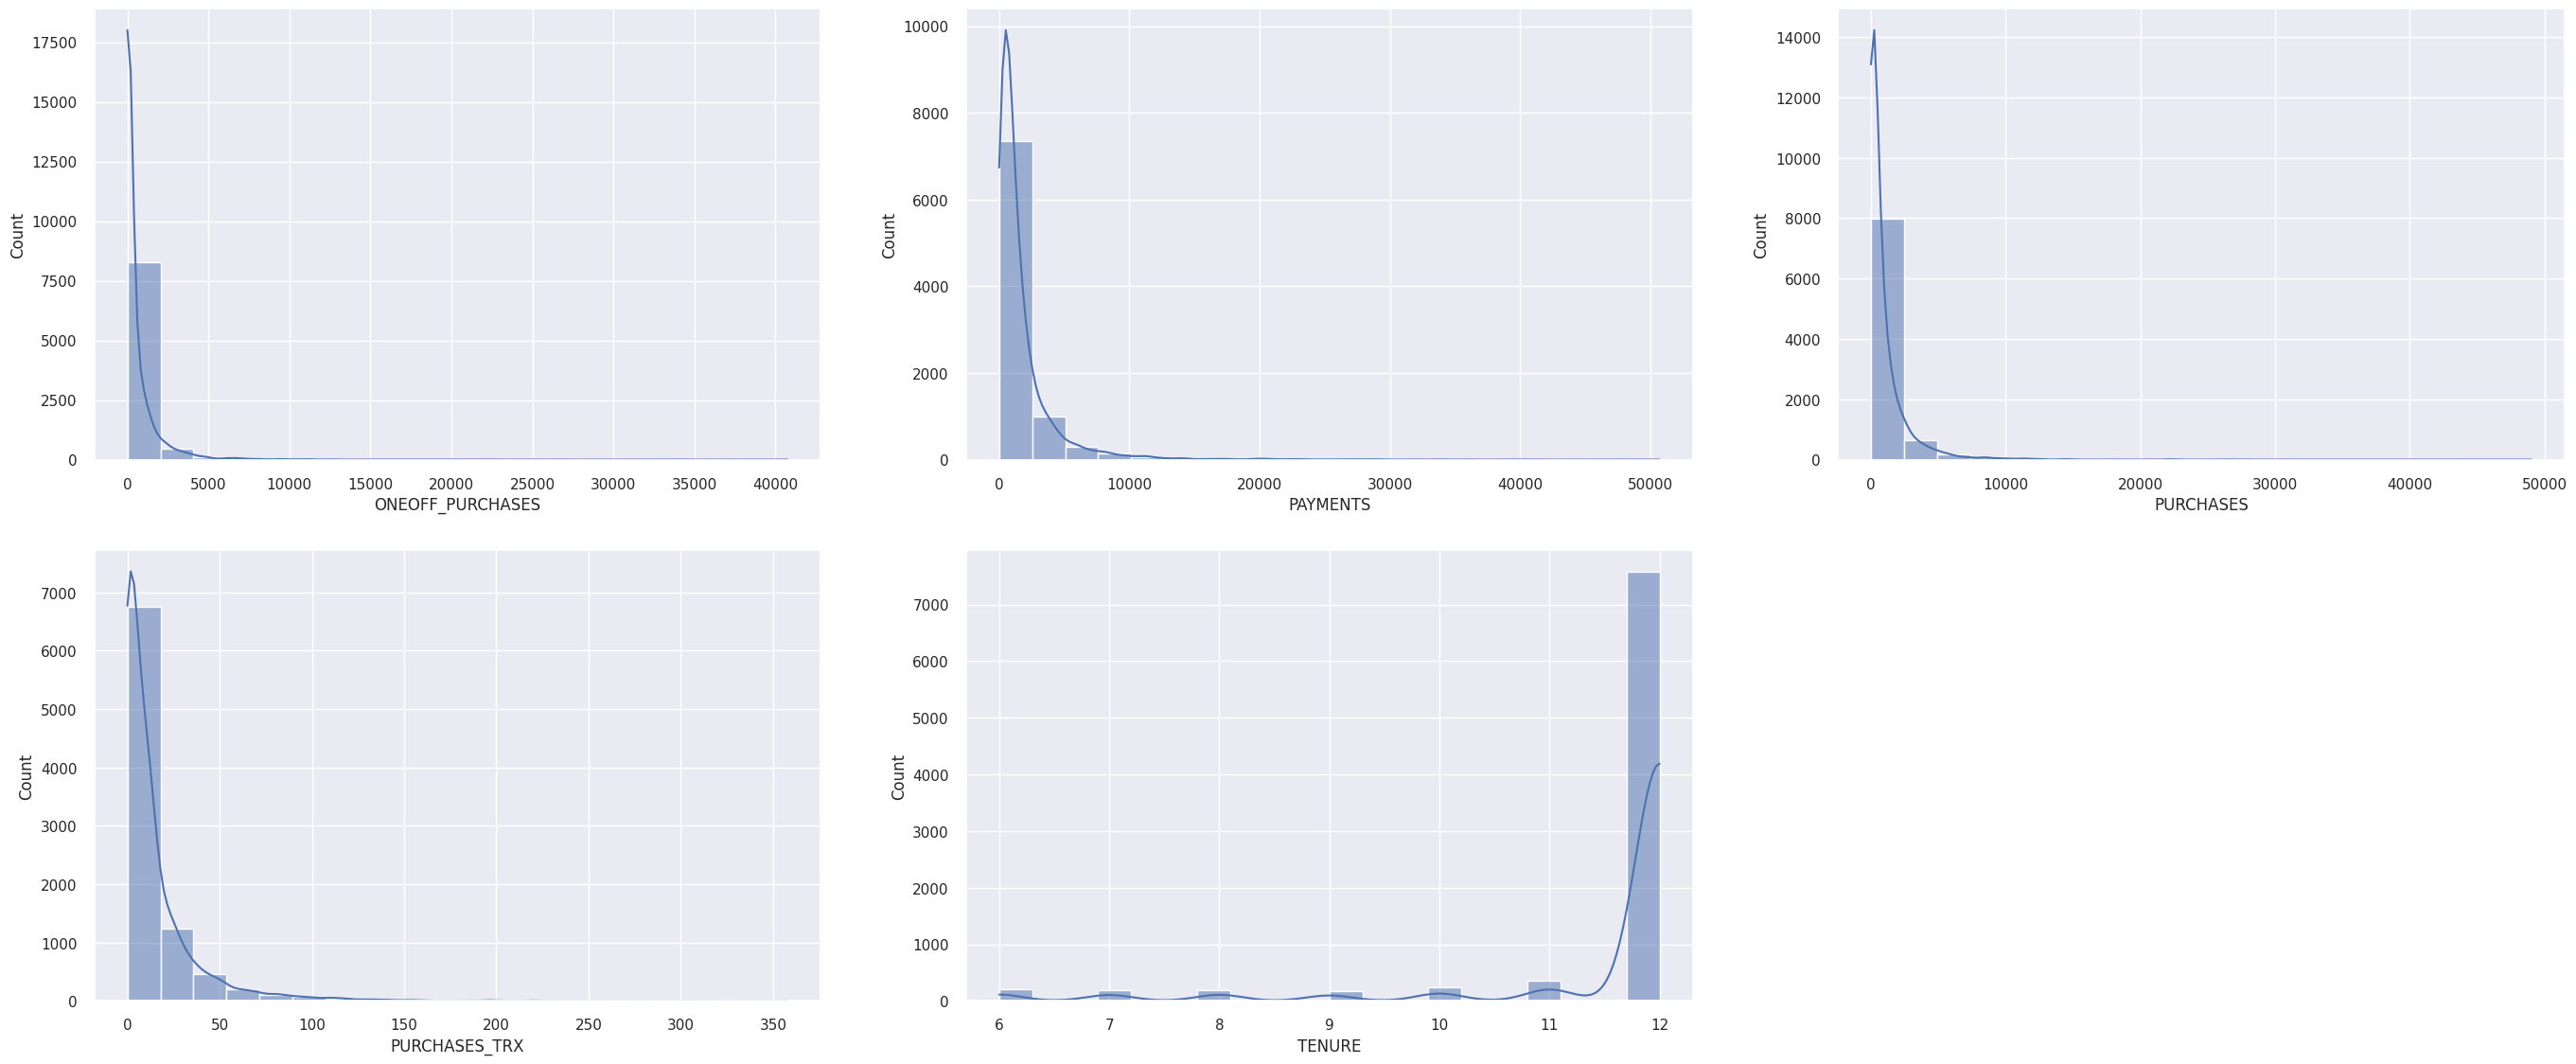

In [ ]:
df = data
plt.figure(figsize=(30,20))

for i, col in enumerate(df.columns.difference(Freq_Cols)[6:]):

        ax = plt.subplot(3, 3, i+1)

        sns.histplot(df[col] , ax=ax , kde=True, bins=20)

        plt.xlabel(col)

plt.show()

<Axes: >

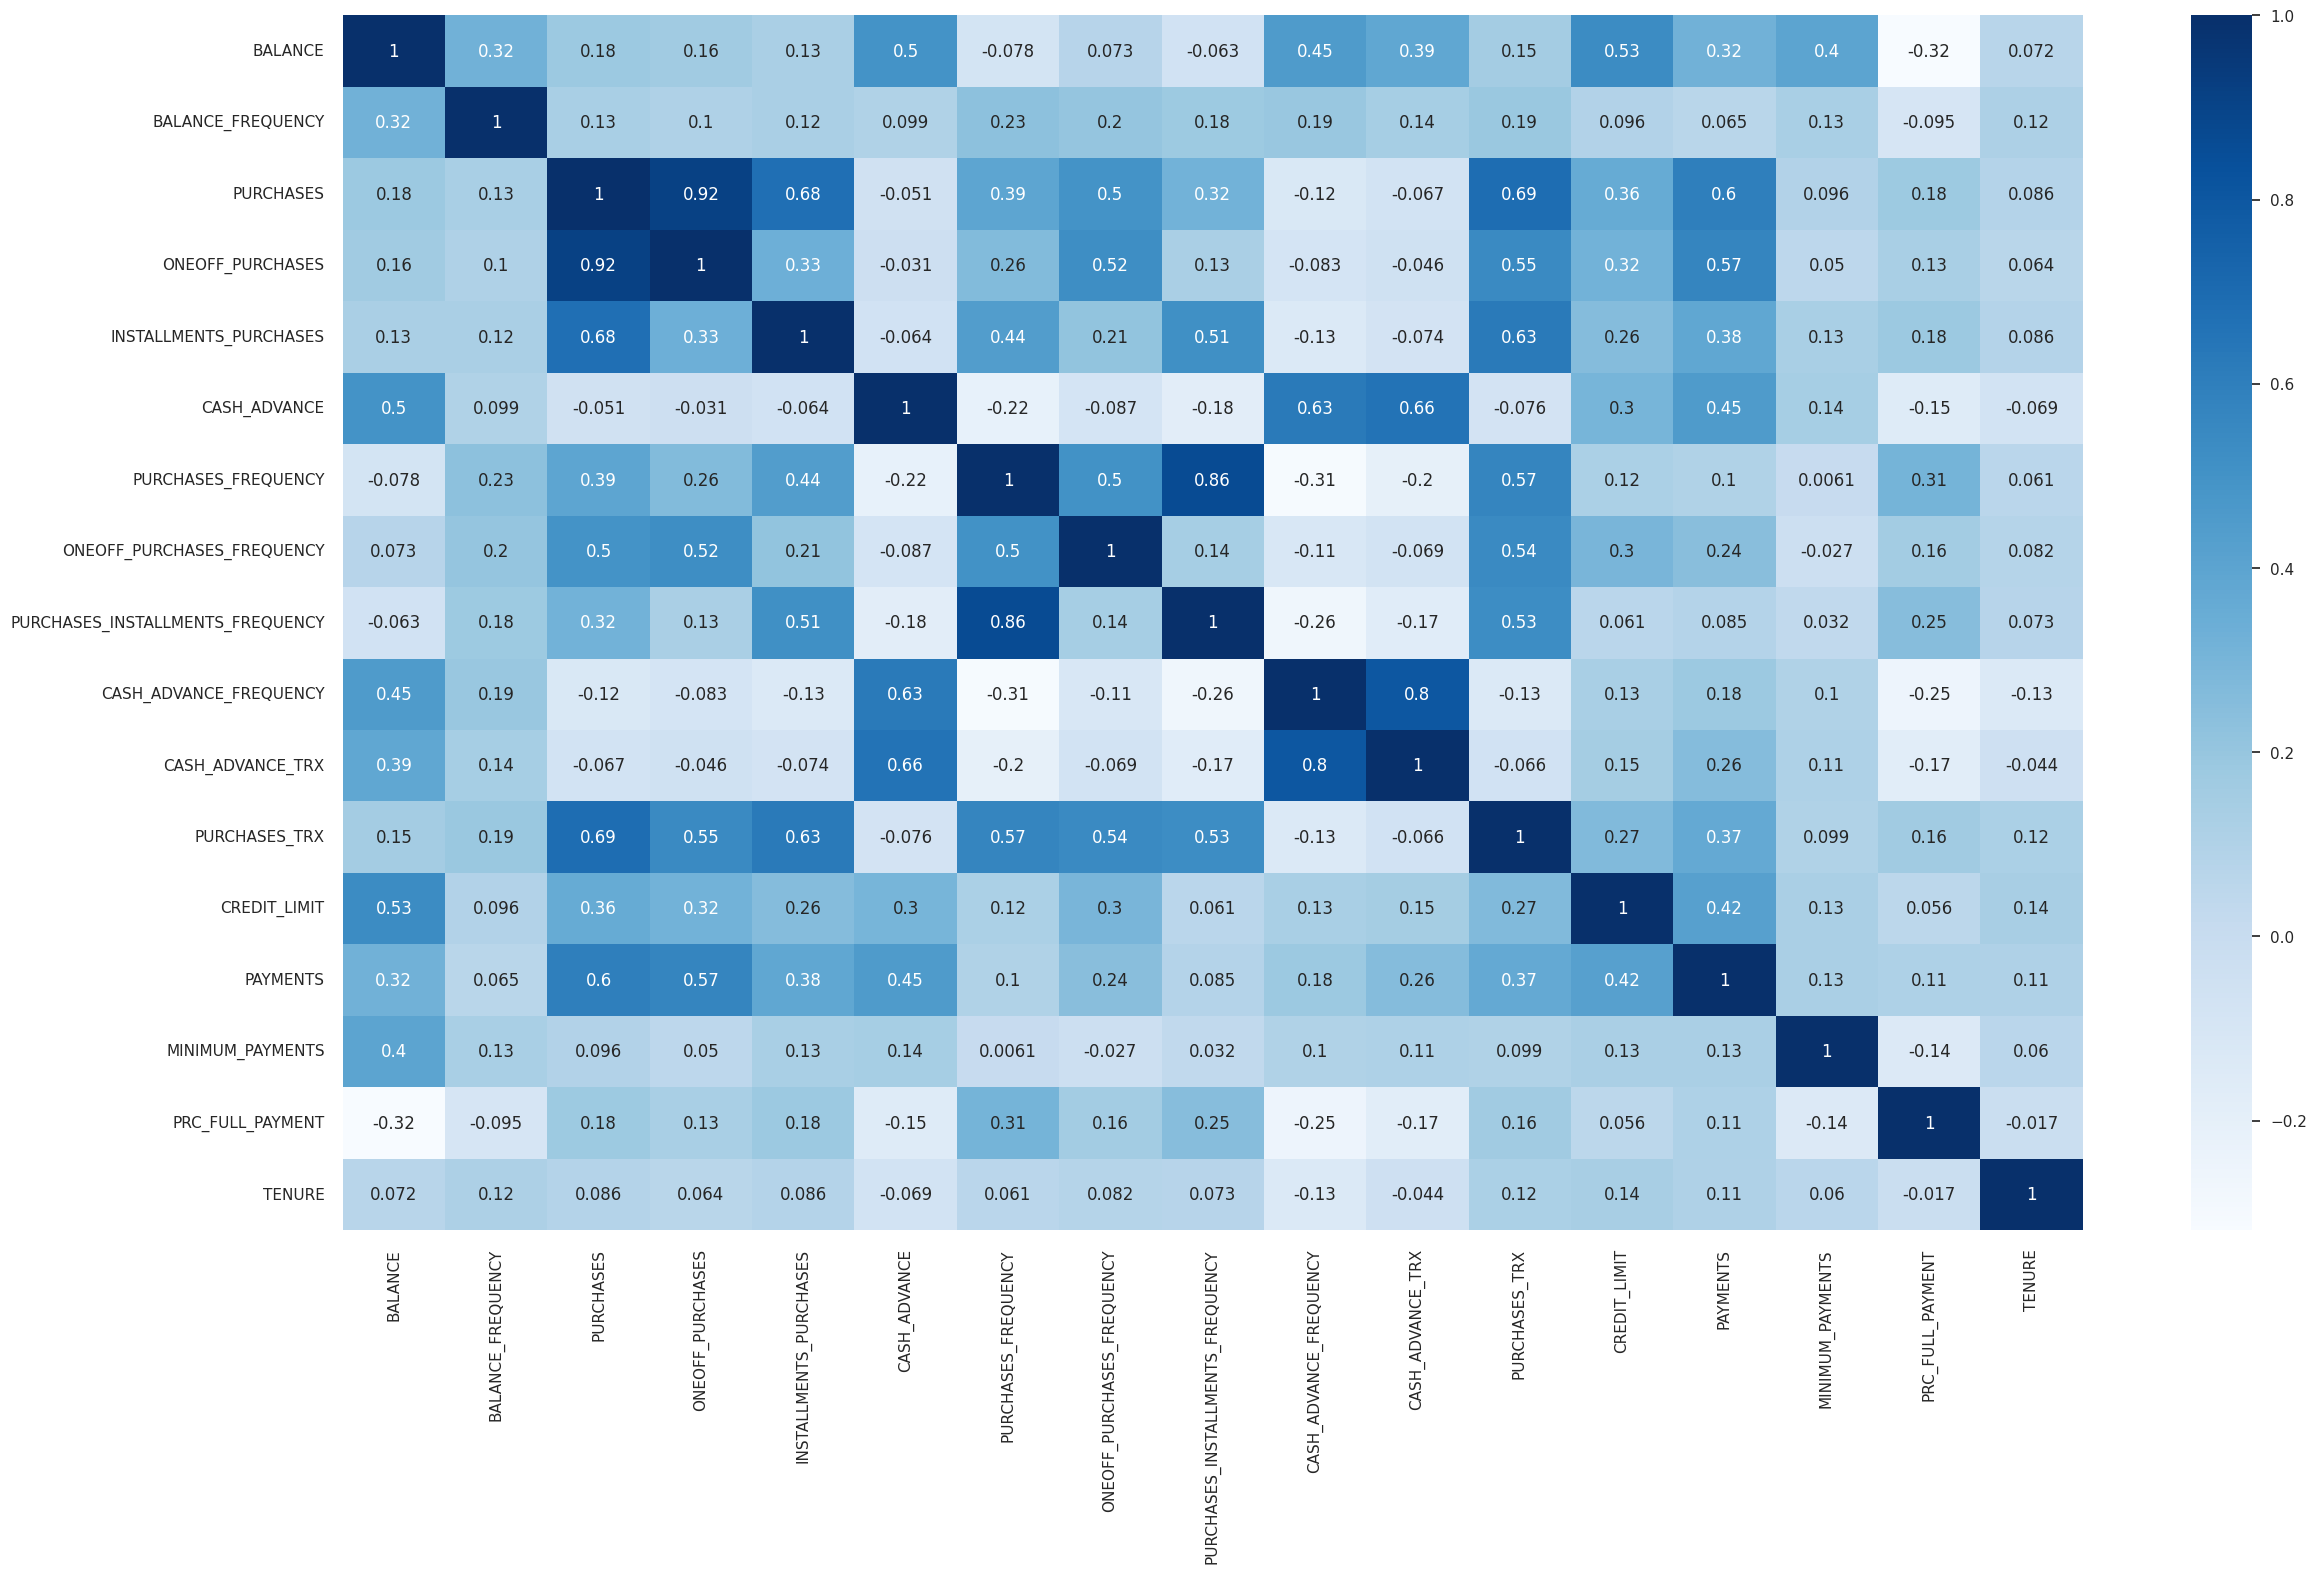

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap( df.corr(), annot=True, cmap='Blues')

<Axes: >

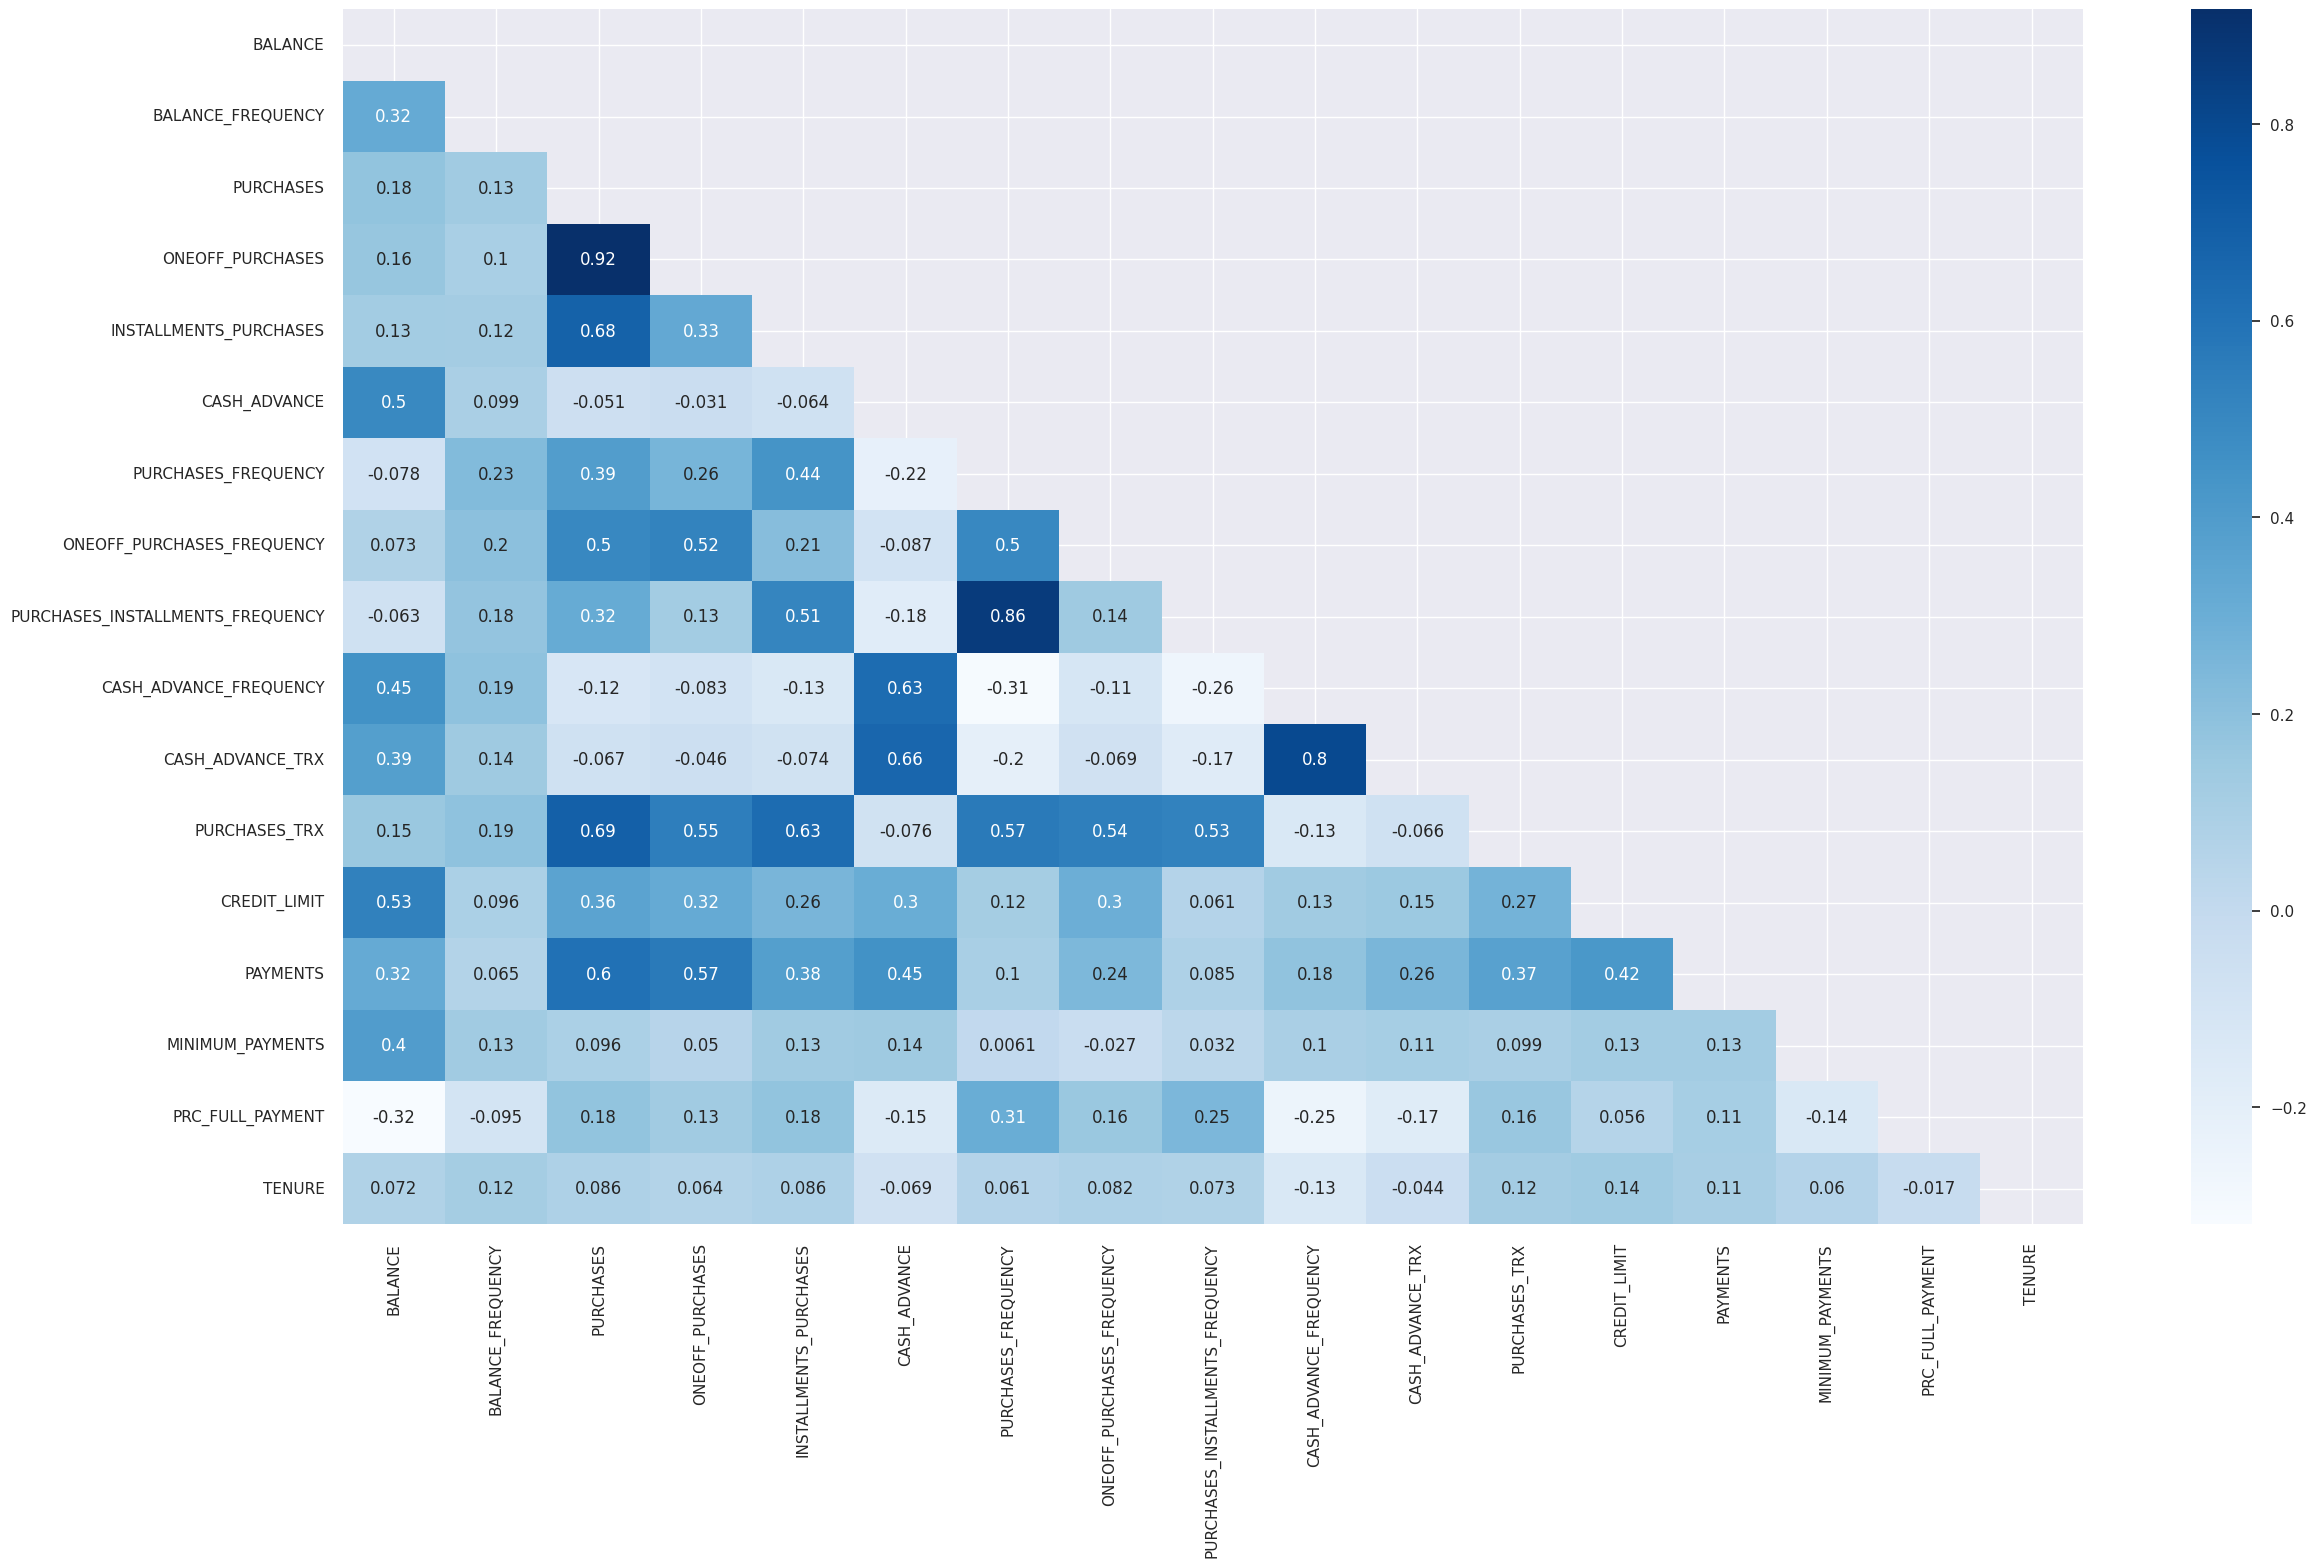

In [ ]:
plt.figure(figsize=(25,15))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap( df.corr(), annot=True, cmap='Blues', mask=mask)

In [ ]:
df.describe().T

count         mean          std        min  \
BALANCE                           8949.0  1564.647593  2081.584016   0.000000   
BALANCE_FREQUENCY                 8949.0     0.877350     0.236798   0.000000   
PURCHASES                         8949.0  1003.316936  2136.727848   0.000000   
ONEOFF_PURCHASES                  8949.0   592.503572  1659.968851   0.000000   
INSTALLMENTS_PURCHASES            8949.0   411.113579   904.378205   0.000000   
CASH_ADVANCE                      8949.0   978.959616  2097.264344   0.000000   
PURCHASES_FREQUENCY               8949.0     0.490405     0.401360   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8949.0     0.202480     0.298345   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8949.0     0.364478     0.397451   0.000000   
CASH_ADVANCE_FREQUENCY            8949.0     0.135141     0.200132   0.000000   
CASH_ADVANCE_TRX                  8949.0     3.249078     6.824987   0.000000   
PURCHASES_TRX                     8949.0    14.711476    24.858552   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8949.0  1733.336511  2895.168146   0.000000   
MINIMUM_PAYMENTS                  8949.0   844.999569  2332.906149   0.019163   
PRC_FULL_PAYMENT                  8949.0     0.153732     0.292511   0.000000   
TENURE                            8949.0    11.517935     1.337134   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.365782   873.680279  2054.372848   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.800000   361.490000  1110.170000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.830000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.650000   
CASH_ADVANCE                         0.000000     0.000000  1113.868654   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.282850   857.062706  1901.279320   
MINIMUM_PAYMENTS                   170.875613   312.343947   788.721609   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [ ]:
for col in df.columns:

    data = df[col]

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    min = Q1 - (1.5 * IQR)
    max = Q3 + (1.5 * IQR)

    outliers = ( (data < min) | (data > max) )

    df.loc[outliers, col] = np.nan

df.isna().sum()

BALANCE                              695
BALANCE_FREQUENCY                   1492
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         248
PAYMENTS                             808
MINIMUM_PAYMENTS                     909
PRC_FULL_PAYMENT                    1474
TENURE                              1365
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()

df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   float64
 11  PURCHASES_TRX                     8949 non-null   float64
 12  CREDIT

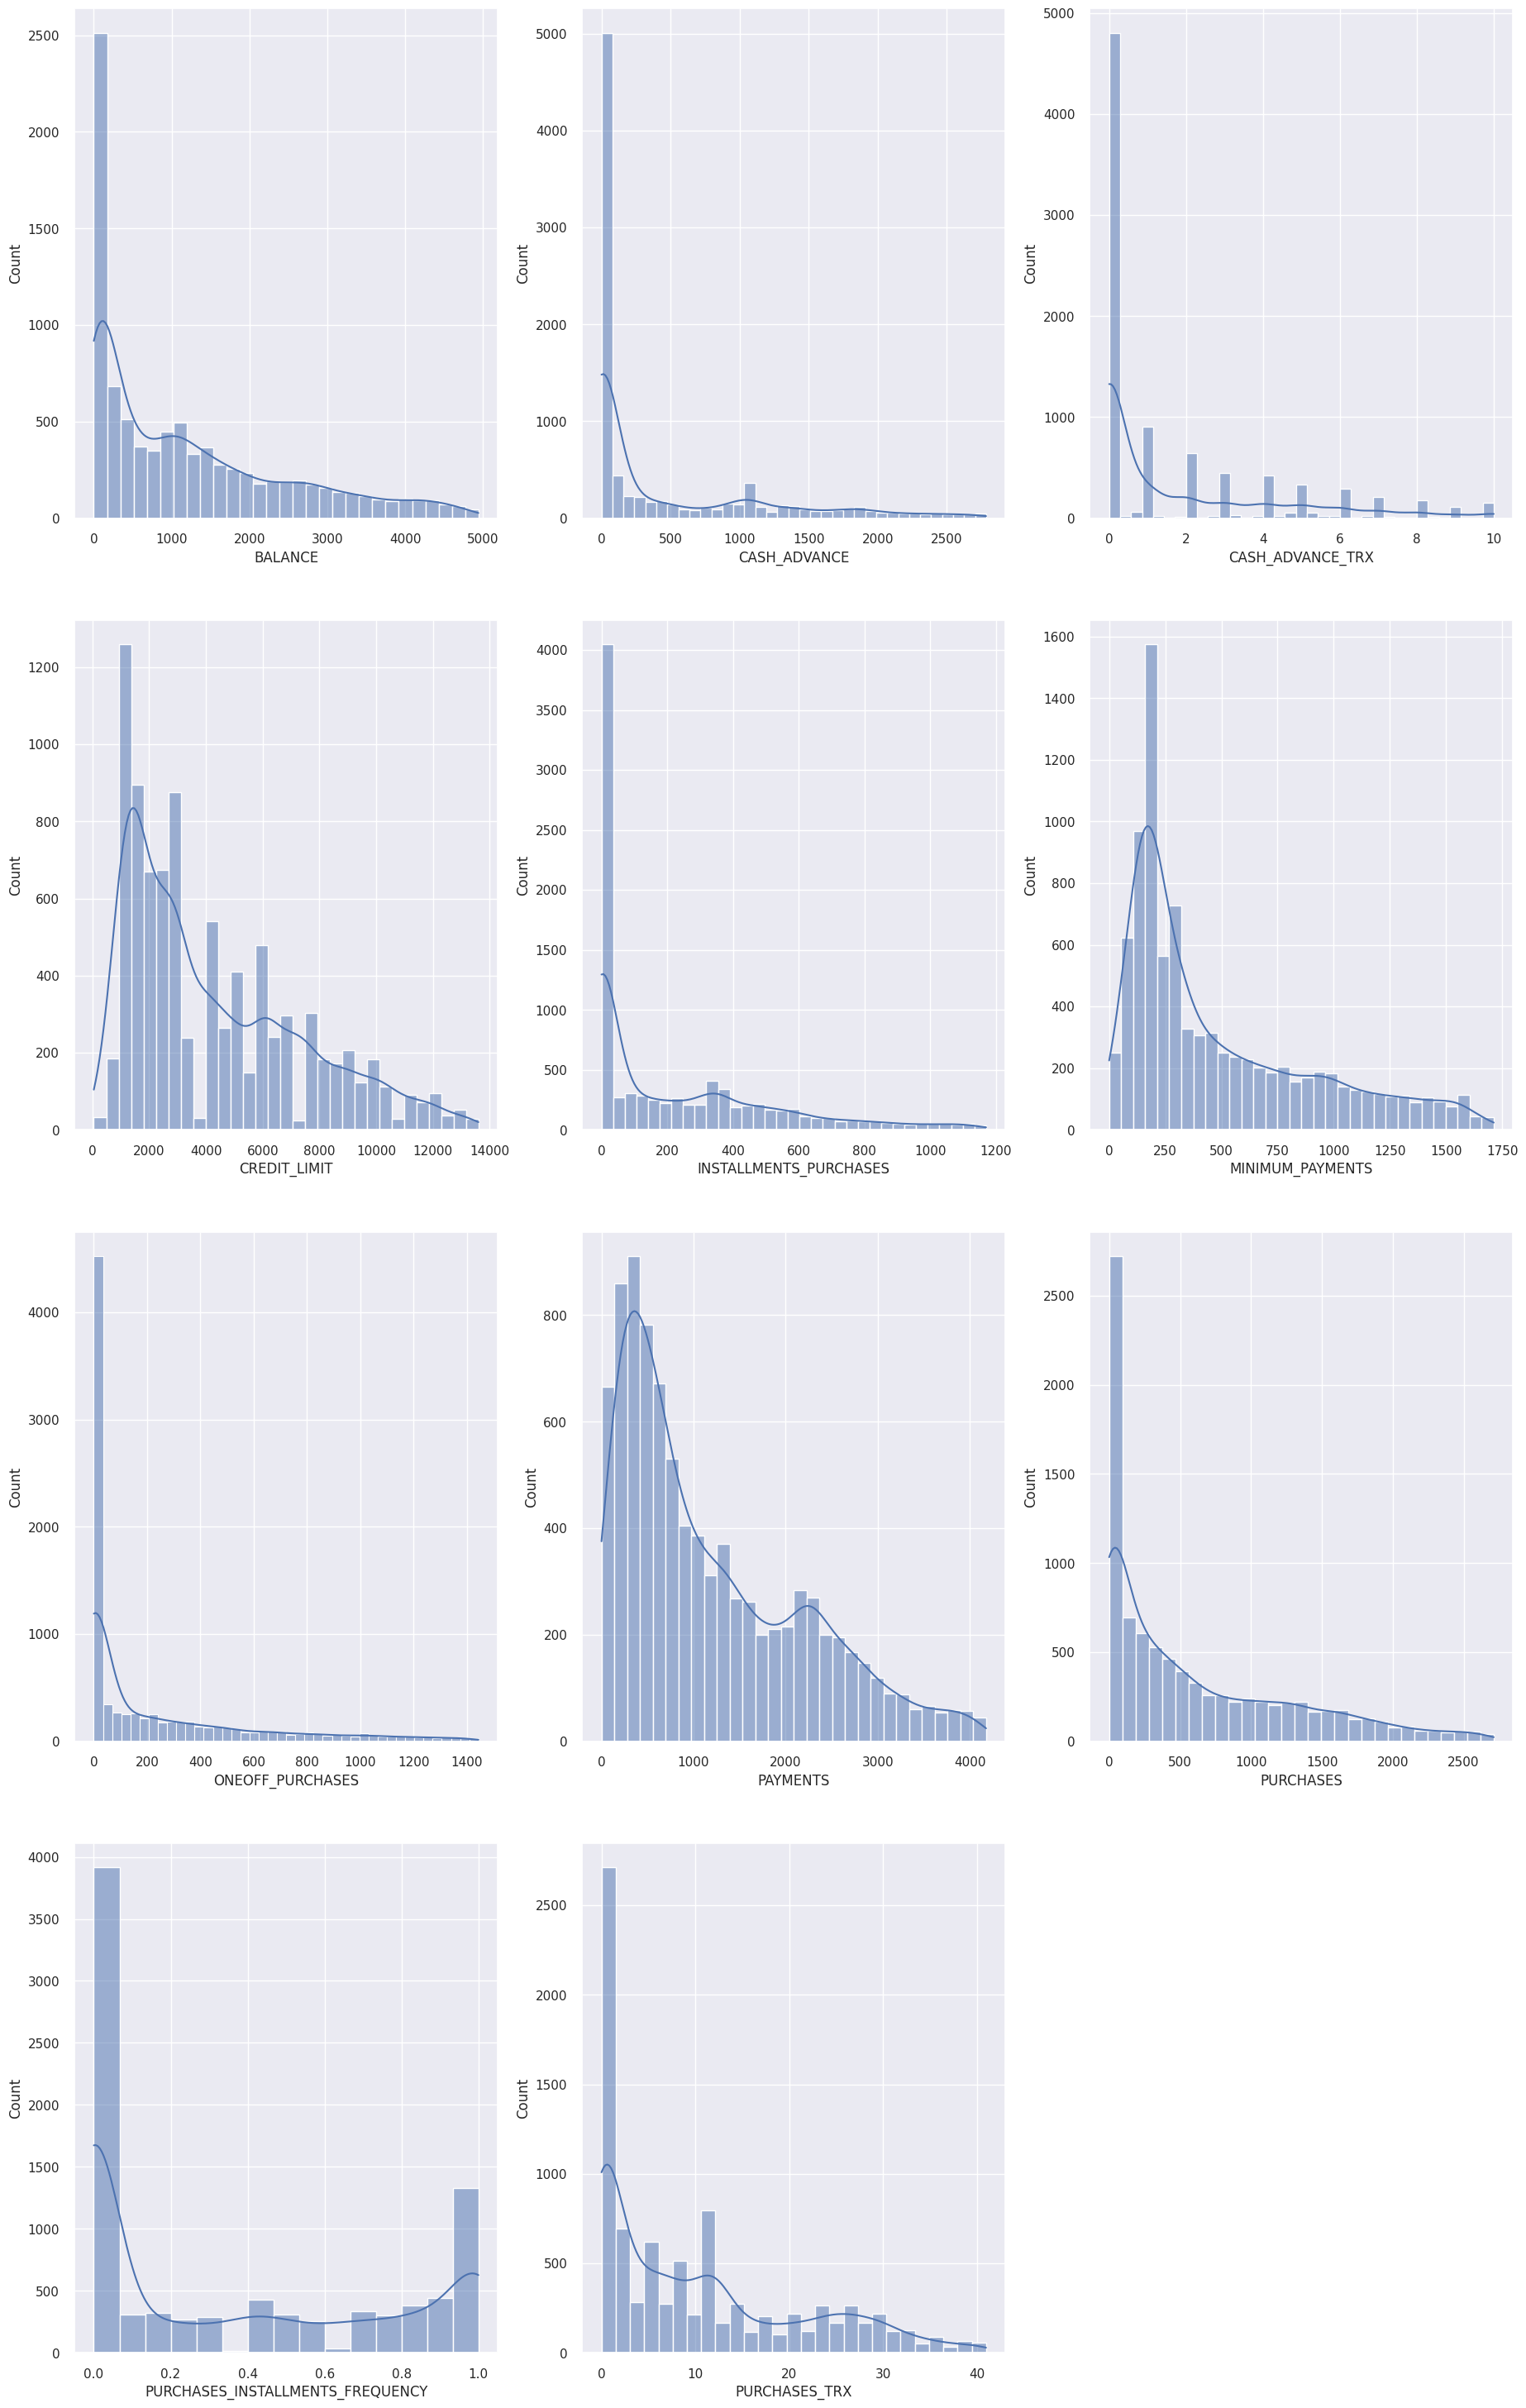

In [ ]:
Skewed_Cols = df.columns.difference(['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                                    'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT', 'TENURE'])

plt.figure(figsize=(20,35))

for i, col in enumerate(df[Skewed_Cols]):

        ax = plt.subplot(4, 3, i+1)

        sns.histplot(df[col] , ax=ax , kde=True)

        plt.xlabel(col)

plt.show()


In [ ]:
trans_df = df.copy()

for col in Skewed_Cols:
    trans_df[col] = np.log(1 + trans_df[col])

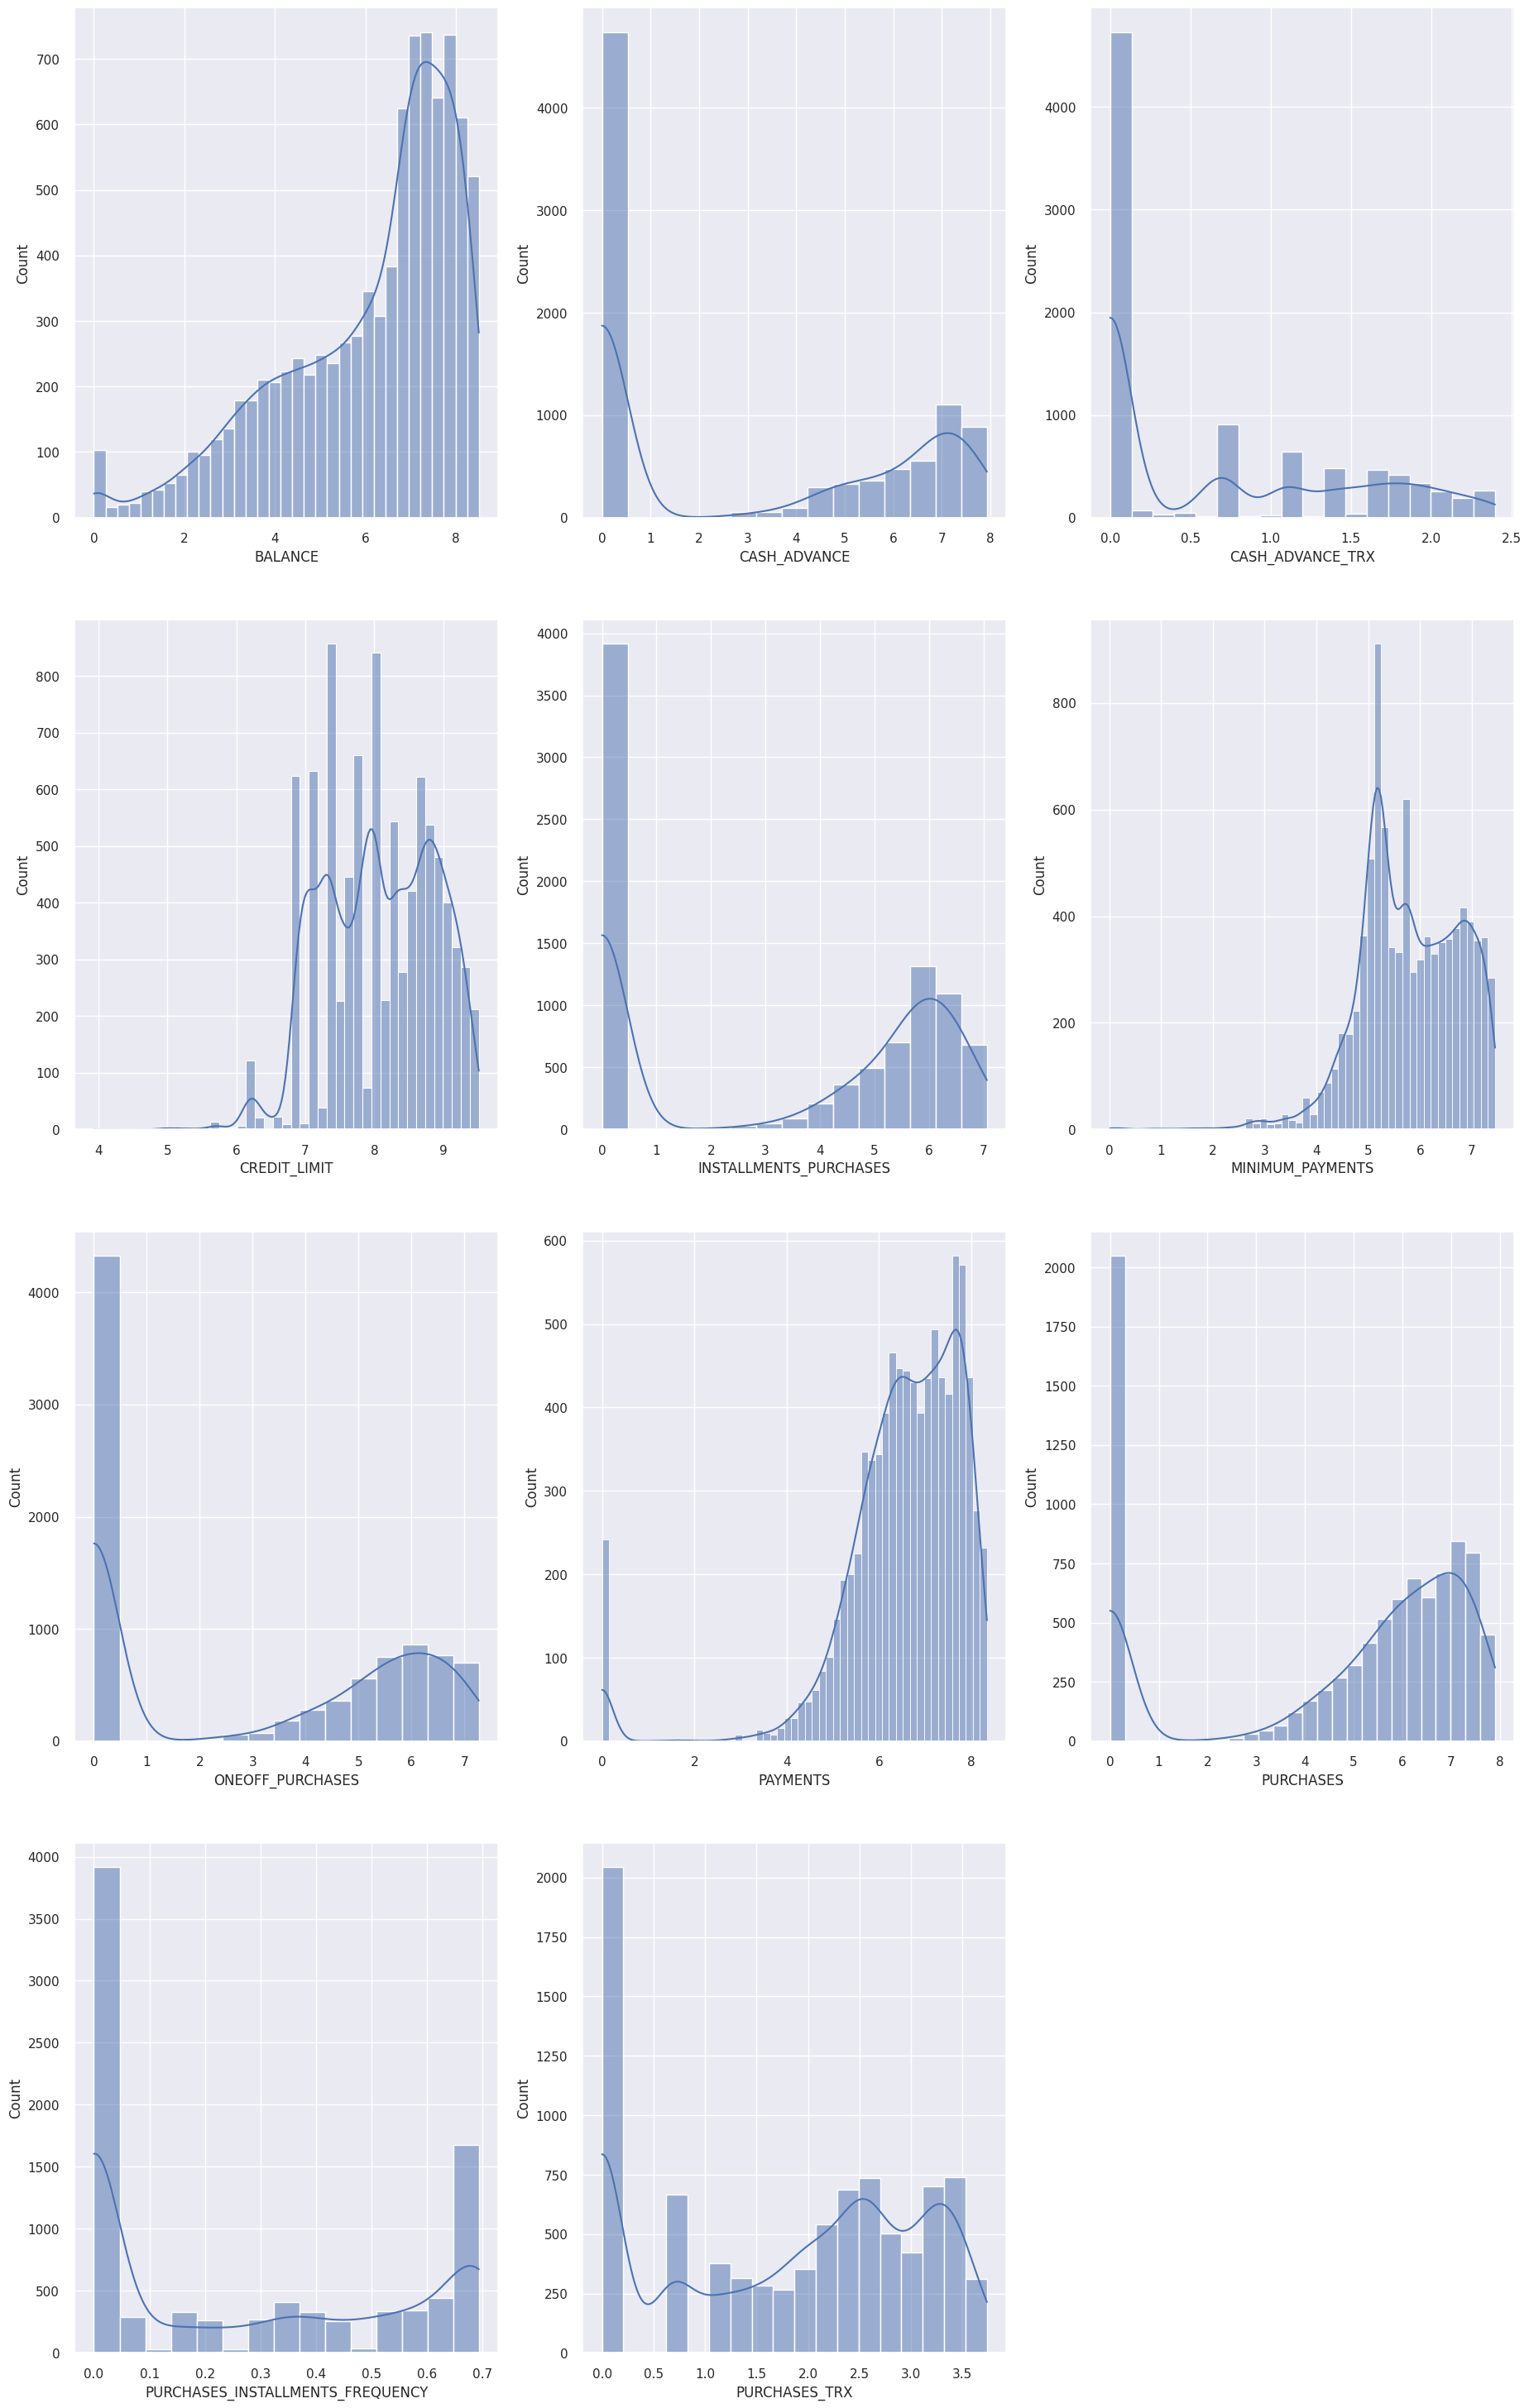

In [ ]:
plt.figure(figsize=(20,35))

for i, col in enumerate(trans_df[Skewed_Cols]):

        ax = plt.subplot(4, 3, i+1)

        sns.histplot(trans_df[col] , ax=ax , kde=True)

        plt.xlabel(col)

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
df_scaled = Scaler.fit_transform(trans_df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -1.218028          -2.647658  -0.075795         -0.996248   
1     1.026043          -1.140357  -1.713215         -0.996248   
2     0.896944           0.366944   0.670885          1.270692   
3     0.688240           0.065483   0.907951          0.959792   
4     0.320093           0.366944  -0.697749         -0.030685   
...        ...                ...        ...               ...   
8944 -1.399726           0.366944   0.321565         -0.996248   
8945 -1.596010           0.366944   0.332298         -0.996248   
8946 -1.497859          -2.396449   0.071507         -0.996248   
8947 -1.768653          -2.396449  -1.713215         -0.996248   
8948 -0.085732           0.366944   0.794909          1.388621   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.471989     -0.915486            -0.806649   
1                  -1.103750      1.202662            -1.221928   
2                  -1.103750     -0.915486             1.269742   
3                  -1.103750      0.703721            -1.014290   
4                  -1.103750     -0.915486            -1.014290   
...                      ...           ...                  ...   
8944                0.854380     -0.915486             1.269742   
8945                0.864709     -0.915486             1.269742   
8946                0.613742     -0.915486             0.854463   
8947               -1.103750      0.185683            -1.221928   
8948               -1.103750      0.558145             0.439186   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.744814                         -0.674357   
1                      -0.744814                         -0.958359   
2                       2.115946                         -0.958359   
3                      -0.378051                         -0.958359   
4                      -0.378051                         -0.958359   
...                          ...                               ...   
8944                   -0.744814                          1.192296   
8945                   -0.744814                          1.192296   
8946                   -0.744814                          0.854123   
8947                   -0.744814                         -0.958359   
8948                    2.189301                         -0.958359   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.746506         -0.823114      -0.572423     -1.475360   
1                   1.029553          1.185670      -1.451085      0.980597   
2                  -0.746506         -0.823114       0.600341      1.067700   
3                  -0.154489          0.042022      -0.896711      1.067700   
4                  -0.746506         -0.823114      -0.896711     -1.245359   
...                      ...               ...            ...           ...   
8944               -0.746506         -0.823114       0.105239     -1.475360   
8945               -0.746506         -0.823114       0.105239     -1.475360   
8946               -0.746506         -0.823114      -0.018050     -1.475360   
8947                0.437536          0.548094      -1.451085     -2.349314   
8948                1.621571          0.548094       1.090698     -1.245359   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    -0.825145         -0.877673         -0.449271     0.0  
1     1.222663          1.229607          2.720754     0.0  
2    -0.060885          0.674572         -0.449271     0.0  
3    -4.442253         -0.046449         -0.449271     0.0  
4    -0.002014         -0.298108         -0.449271     0.0  
...        ...               ...               ...     ...  
8944 -0.500703         -1.950904         -0.211520     0.0  
8945 -0.613190         -0.046449         -0.449271     0.0  
8946 -1.439465         -1.418065          3.117011     0.0  
8947 -1.7

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

X_pca = pca.fit_transform(df_scaled)

In [ ]:
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]

X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.069796  3.130811  0.006396  0.663919 -0.068158  2.462334  0.613468   
1  3.672927 -1.013897  0.494409  2.506673 -2.158713 -0.485405  0.574291   
2 -1.523284 -1.488468 -2.741011 -0.786700 -0.156101 -0.084165  0.047017   
3  1.377533  0.859298 -1.746111 -1.311830  1.696081  0.603446 -1.822839   
4  1.074717  1.564840 -1.307795 -0.927415 -0.375704 -0.111225  1.387779   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.140814 -0.188834  0.281248 -0.019296 -0.618209  0.614137 -0.021790   
1 -1.199969  0.254733  0.103307 -0.124536 -0.051441 -0.193520 -0.103747   
2 -0.590857  1.089029  0.304061 -0.012100  0.869735  0.153590 -0.091977   
3 -3.132442 -1.127105 -1.117890  0.549913  0.737677  0.497196  0.287129   
4  0.467646 -0.041009 -0.111425  0.472472  0.110265 -0.121659 -0.099385   

       PC15      PC16  PC17  
0  0.063023  0.121120   0.0  
1 -0.006581  0.022669  -0.0  
2  0.106437  0.578654   0.0  
3  0.661442 -0.138471  -0.0  
4 -0.048007 -0.056304   0.0

In [ ]:
pca.explained_variance_ratio_

array([0.35734043, 0.19074322, 0.10161503, 0.07789757, 0.0613016 ,
       0.0565055 , 0.04645208, 0.03719404, 0.02038241, 0.01273023,
       0.01107641, 0.00945687, 0.00828418, 0.00445624, 0.00255905,
       0.00200514, 0.        ])

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.35734043, 0.54808365, 0.64969868, 0.72759625, 0.78889785,
       0.84540335, 0.89185543, 0.92904946, 0.94943188, 0.96216211,
       0.97323852, 0.98269538, 0.99097956, 0.9954358 , 0.99799486,
       1.        , 1.        ])

In [ ]:
def plot_variance(pca, width=8, dpi=100):

    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )

    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
         )
    # Set up figure

    fig.set(figwidth=8, dpi=100)
    return axs

array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

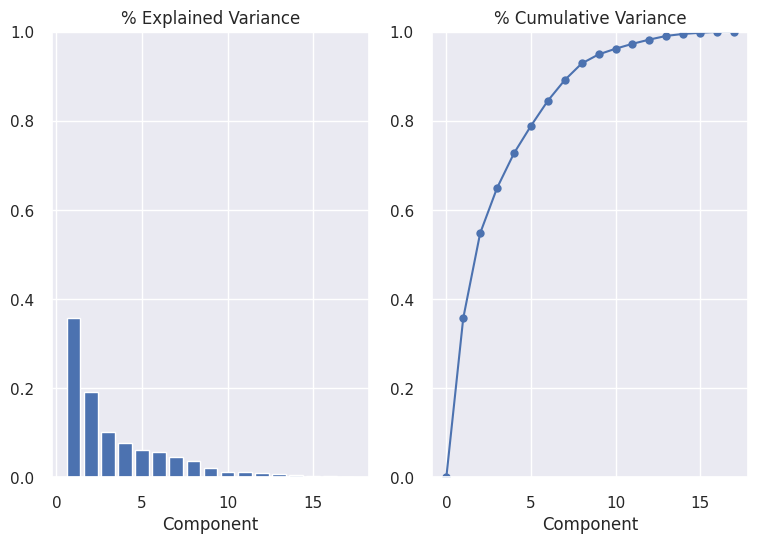

In [ ]:
plot_variance(pca)

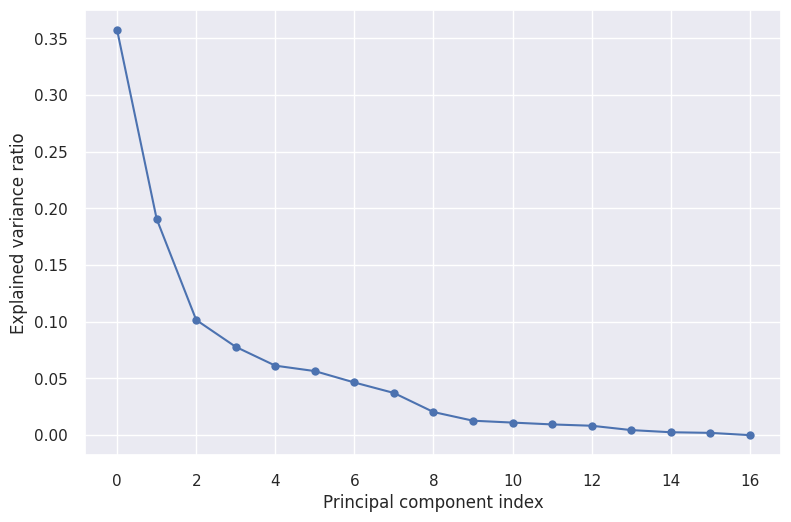

In [ ]:
# Plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_, '-o')

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

In [ ]:
pca = PCA(n_components = 5 )

X_pca = pca.fit_transform(df_scaled)

In [ ]:
# Convert to dataframe

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]

X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

PC1       PC2       PC3       PC4       PC5
0  0.069796  3.130811  0.006396  0.663919 -0.068158
1  3.672927 -1.013897  0.494409  2.506673 -2.158713
2 -1.523284 -1.488468 -2.741011 -0.786700 -0.156100
3  1.377533  0.859298 -1.746111 -1.311830  1.696081
4  1.074717  1.564840 -1.307795 -0.927415 -0.375704

In [ ]:
pca.explained_variance_ratio_

array([0.35734043, 0.19074322, 0.10161503, 0.07789757, 0.0613016 ])

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.35734043, 0.54808365, 0.64969868, 0.72759625, 0.78889785])

array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

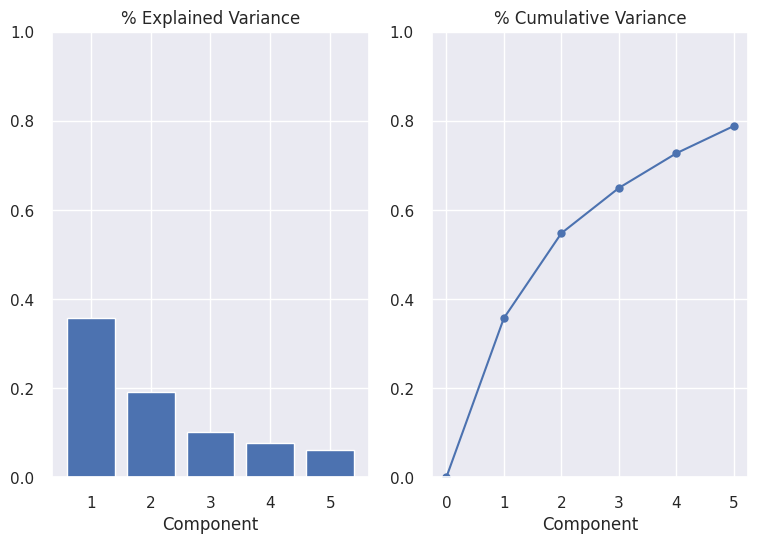

In [ ]:
plot_variance(pca)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

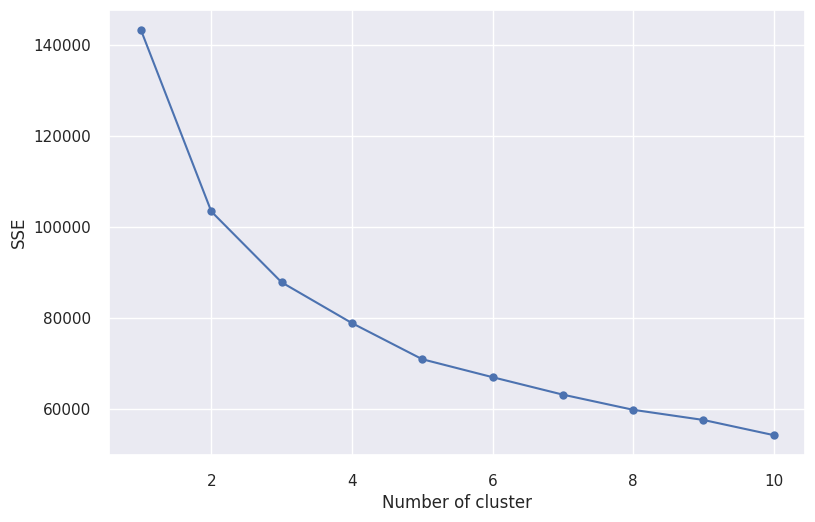

In [ ]:
n_clusters = 10

inertias = []

for n_cluster in range(1 , n_clusters+1):

    kmean= KMeans(n_cluster, random_state=0)

    kmean.fit(df_scaled)

    inertias.append(kmean.inertia_)

plt.plot(range(1 , n_clusters+1), inertias, '-o')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


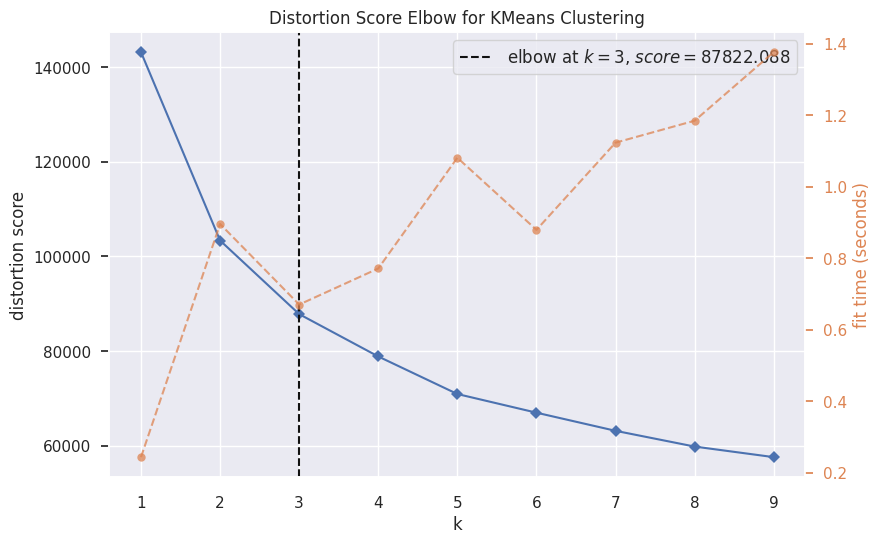

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)

vis_elbow = KElbowVisualizer(kmeans, k = (1, 10))
vis_elbow.fit(df_scaled)
vis_elbow.poof()

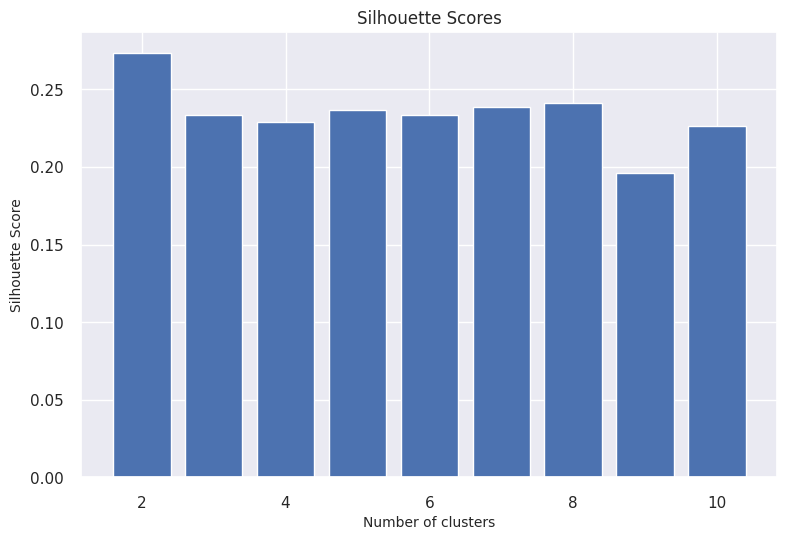

In [ ]:
silhouette_scores = []

for n_cluster in range(2 , n_clusters+1):

  kmeans = KMeans(n_cluster, random_state=0)

  labels = kmeans.fit_predict(df_scaled)

  silhouette_scores.append(silhouette_score(df_scaled, labels))

plt.bar(range(2 , n_clusters+1), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.title('Silhouette Scores')
plt.show()

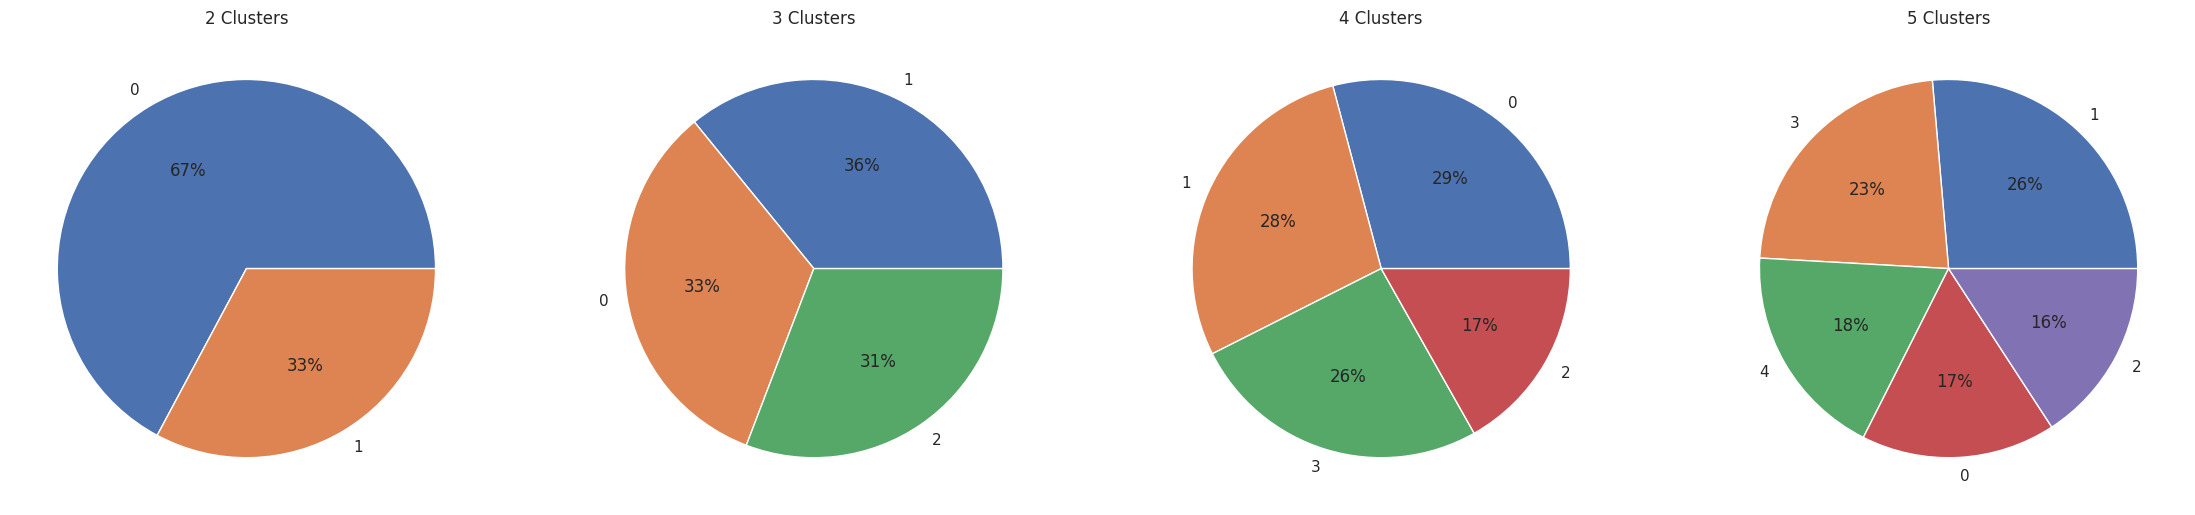

In [ ]:
plt.figure(figsize=(25,25))

for i, n_cluster in enumerate(range(2,6)):

  kmeans = KMeans(n_clusters=n_cluster, random_state=0)

  labels = kmeans.fit_predict(df_scaled)

  labels = pd.Series(labels)

  ax = plt.subplot(1 , 4, i+1)

  ax.set_title(f"{n_cluster} Clusters")

  labels.value_counts().plot.pie(autopct='%1.0f%%', ax = ax)

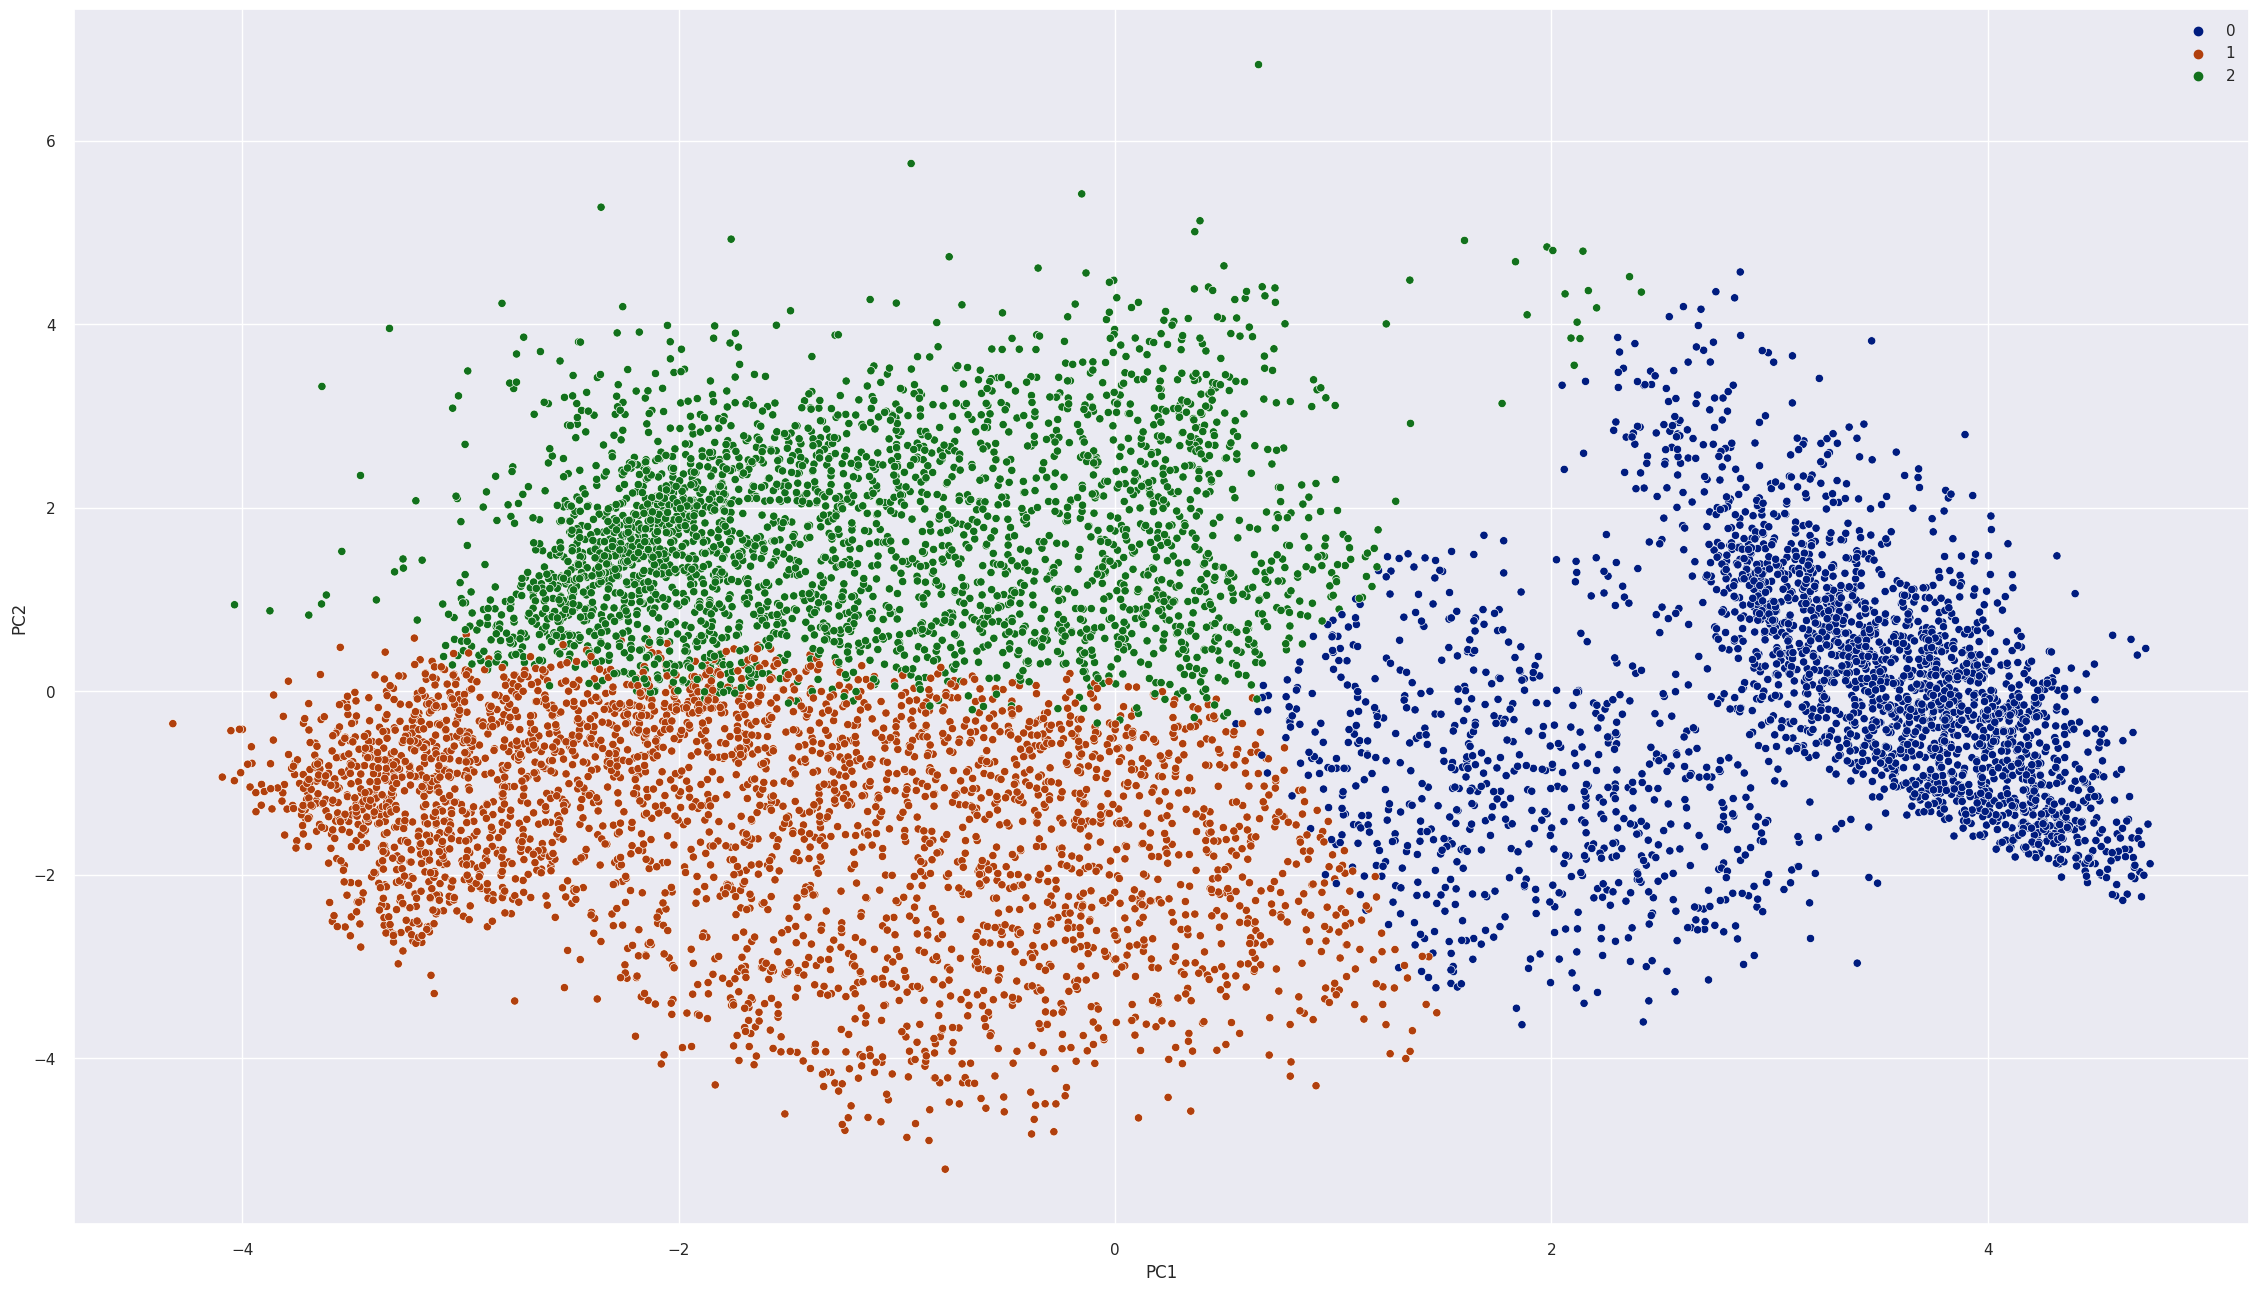

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state=10)

pca_labels = kmeans.fit_predict(X_pca)
plt.figure(figsize=(25,15))

ax = sns.scatterplot(x= X_pca["PC1"], y= X_pca["PC2"], hue = pca_labels, data = X_pca, palette='dark')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)

scaled_labesl = kmeans.fit_predict(df_scaled)
df["Clusters"] = scaled_labesl

df["Clusters"] = df["Clusters"].astype('category')

df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40             0.000   
1     3202.467416           0.909091       0.00             0.000   
2     2495.148862           1.000000     773.17           773.170   
3     1666.670542           0.981818    1499.00           309.918   
4      817.714335           1.000000      16.00            16.000   
...           ...                ...        ...               ...   
8944    28.493517           1.000000     291.12             0.000   
8945    19.183215           1.000000     300.00             0.000   
8946    23.398673           0.833333     144.40             0.000   
8947    13.457564           0.833333       0.00             0.000   
8948   372.708075           1.000000    1093.25          1093.250   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   1068.127248             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8944                  291.12      0.000000             1.000000   
8945                  300.00      0.000000             1.000000   
8946                  144.40      0.000000             0.833333   
8947                    0.00     36.558778             0.000000   
8948                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       0.650000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8944                    0.000000                          0.833333   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.666667   
8947                    0.000000                          0.000000   
8948                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000               0.0            2.0        1000.0   
1                   0.250000               4.0            0.0        7000.0   
2                   0.000000               0.0           12.0        7500.0   
3                   0.083333               1.0            1.0        7500.0   
4                   0.000000               0.0            1.0        1200.0   
...                      ...               ...            ...           ...   
8944                0.000000               0.0            6.0        1000.0   
8945                0.000000               0.0            6.0        1000.0   
8946                0.000000               0.0            5.0        1000.0   
8947                0.166667               2.0            0.0         500.0   
8948                0.333333               2.0           23.0        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE Clusters  
0      201.802084        139.509787          0.000000    12.0        0  
1     4103.032597       1072.340217          0.222222    12.0        2  
2      622.066742        627.284787          0.000000    12.0        1  
3        0.000000        312.343947          0.000000    12.0        2  
4      678.334763        244.791237          0.000000    12.0        0  
...           ...               ...               ...     ...      ...  
8944   325.594462         48.886365          0.016667    12.0        0  
89

<Figure size 2000x3500 with 0 Axes>

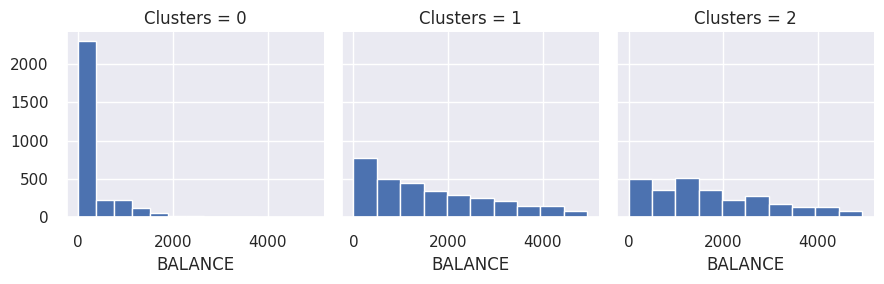

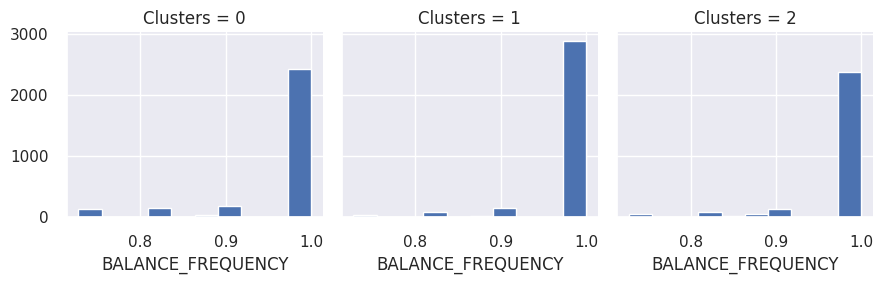

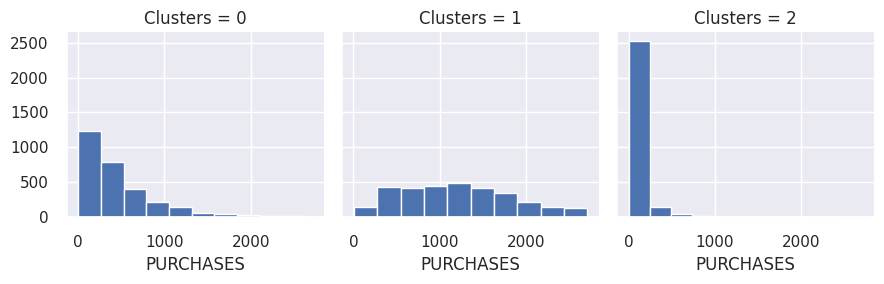

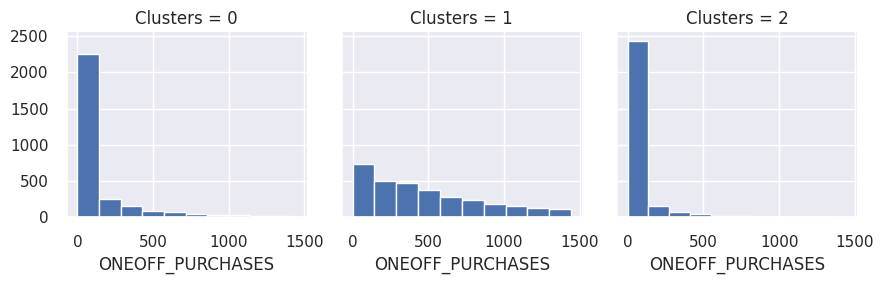

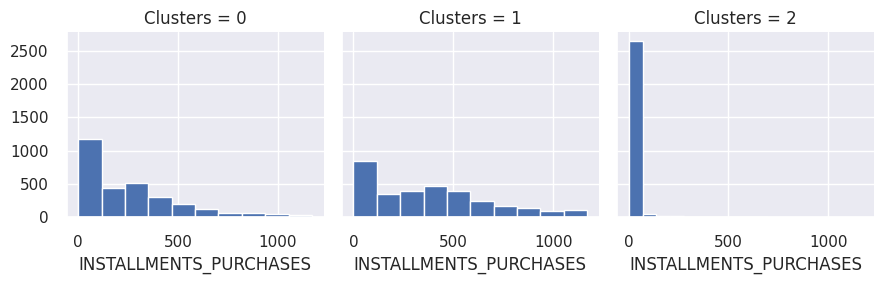

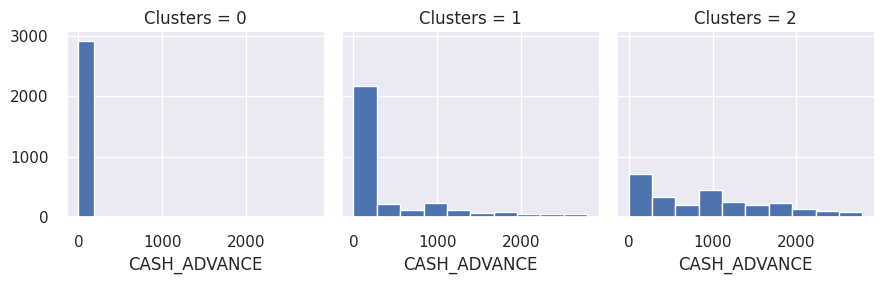

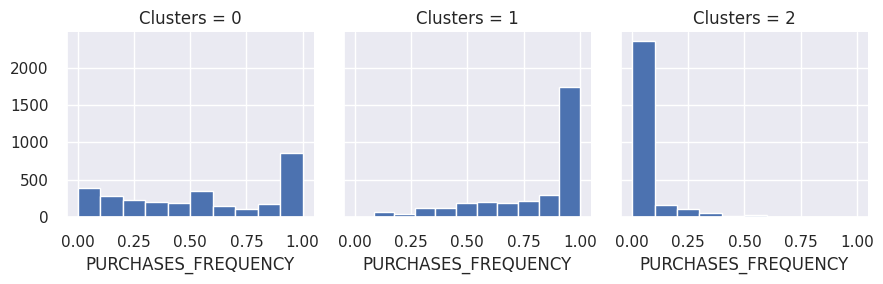

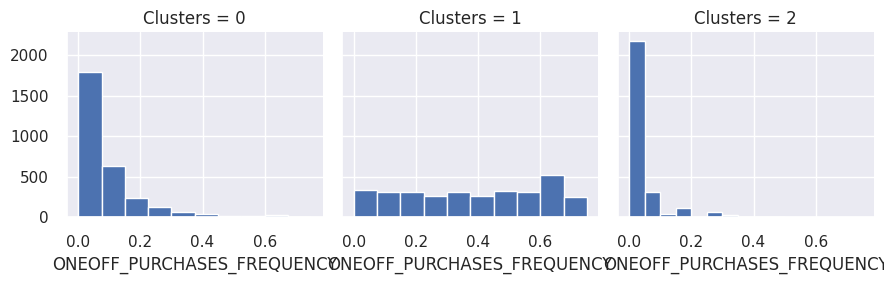

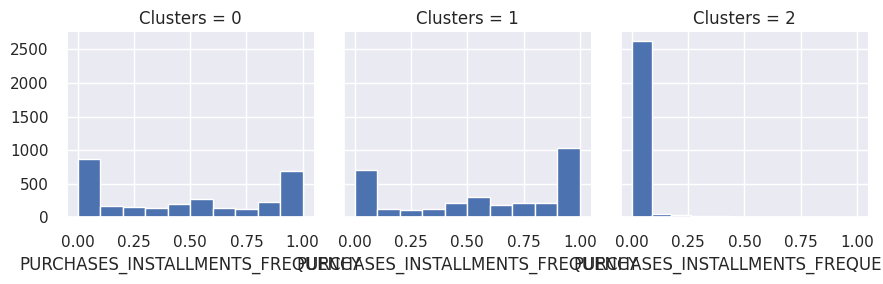

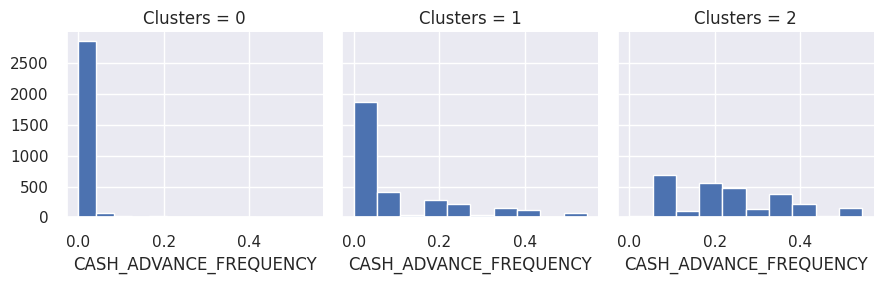

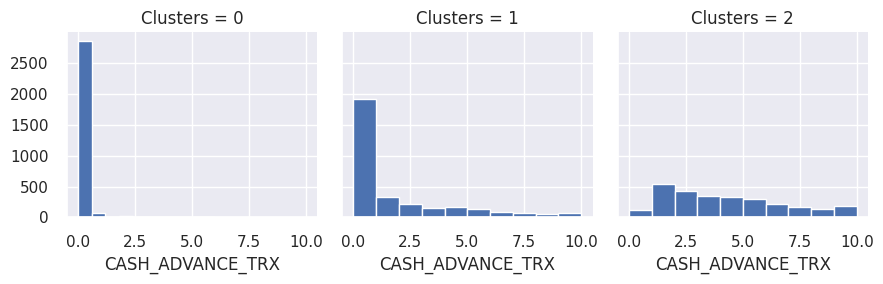

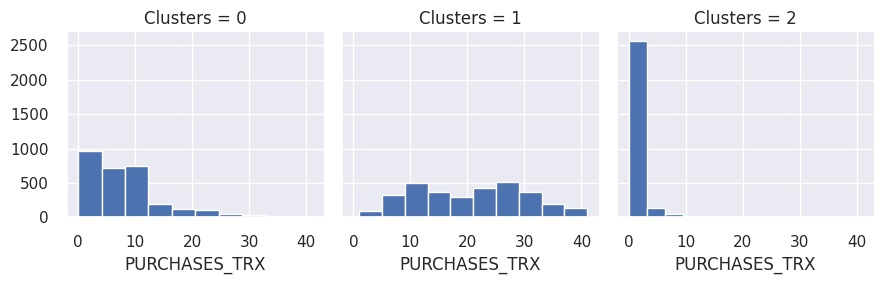

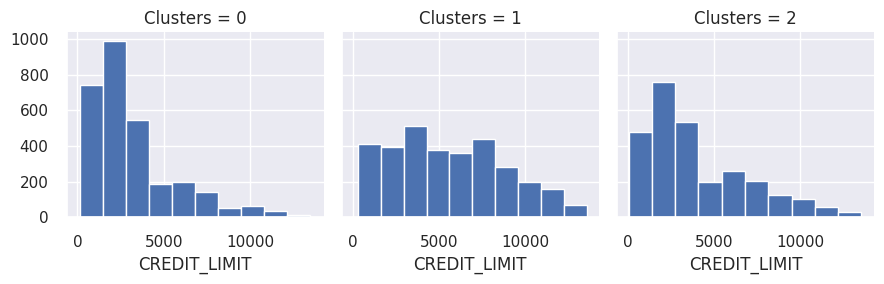

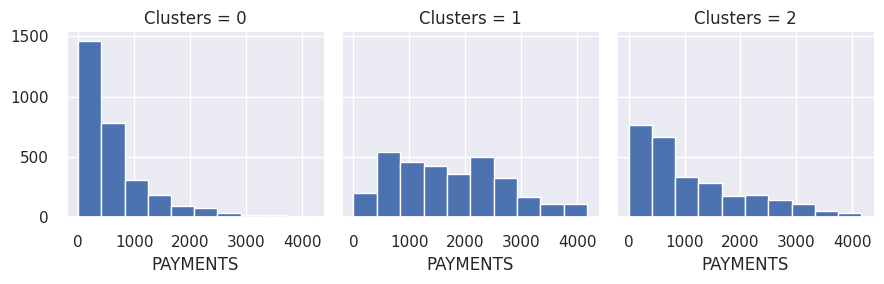

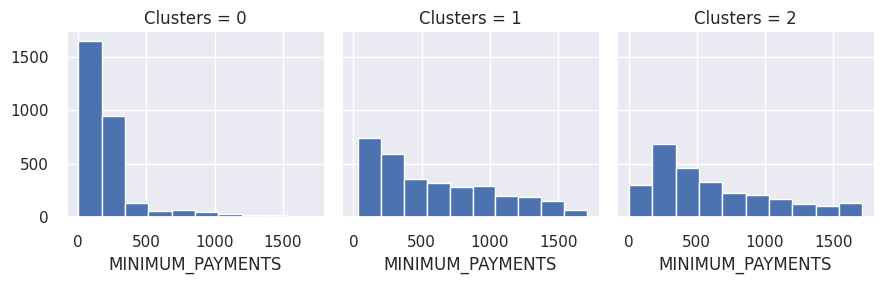

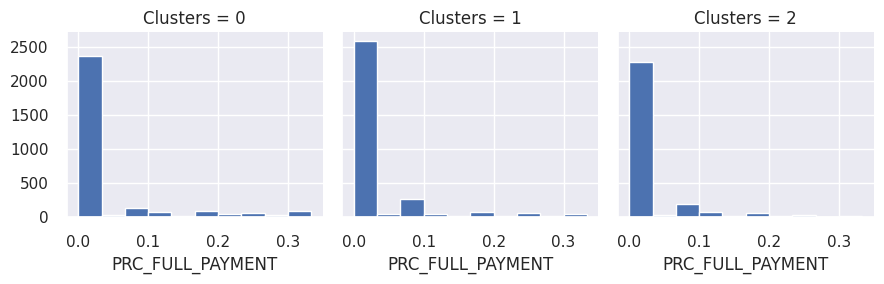

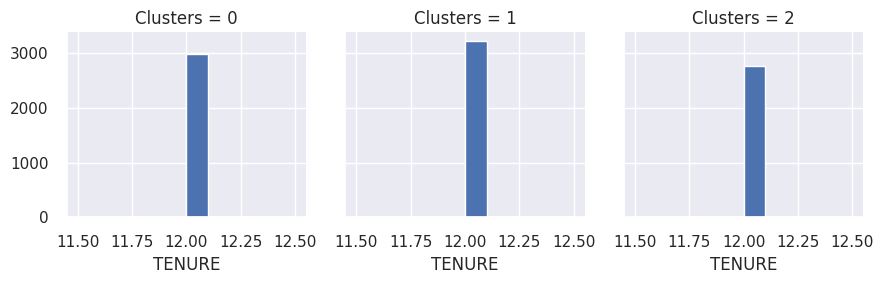

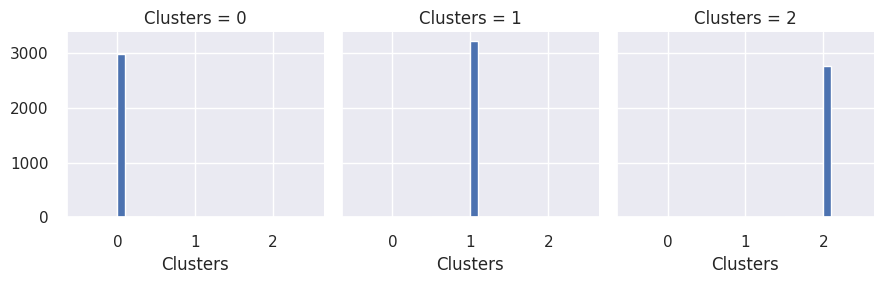

In [ ]:
plt.figure(figsize=(20,35))

for col in df.columns:

    grid = sns.FacetGrid(df, col='Clusters')

    grid.map(plt.hist, col)

    plt.show()

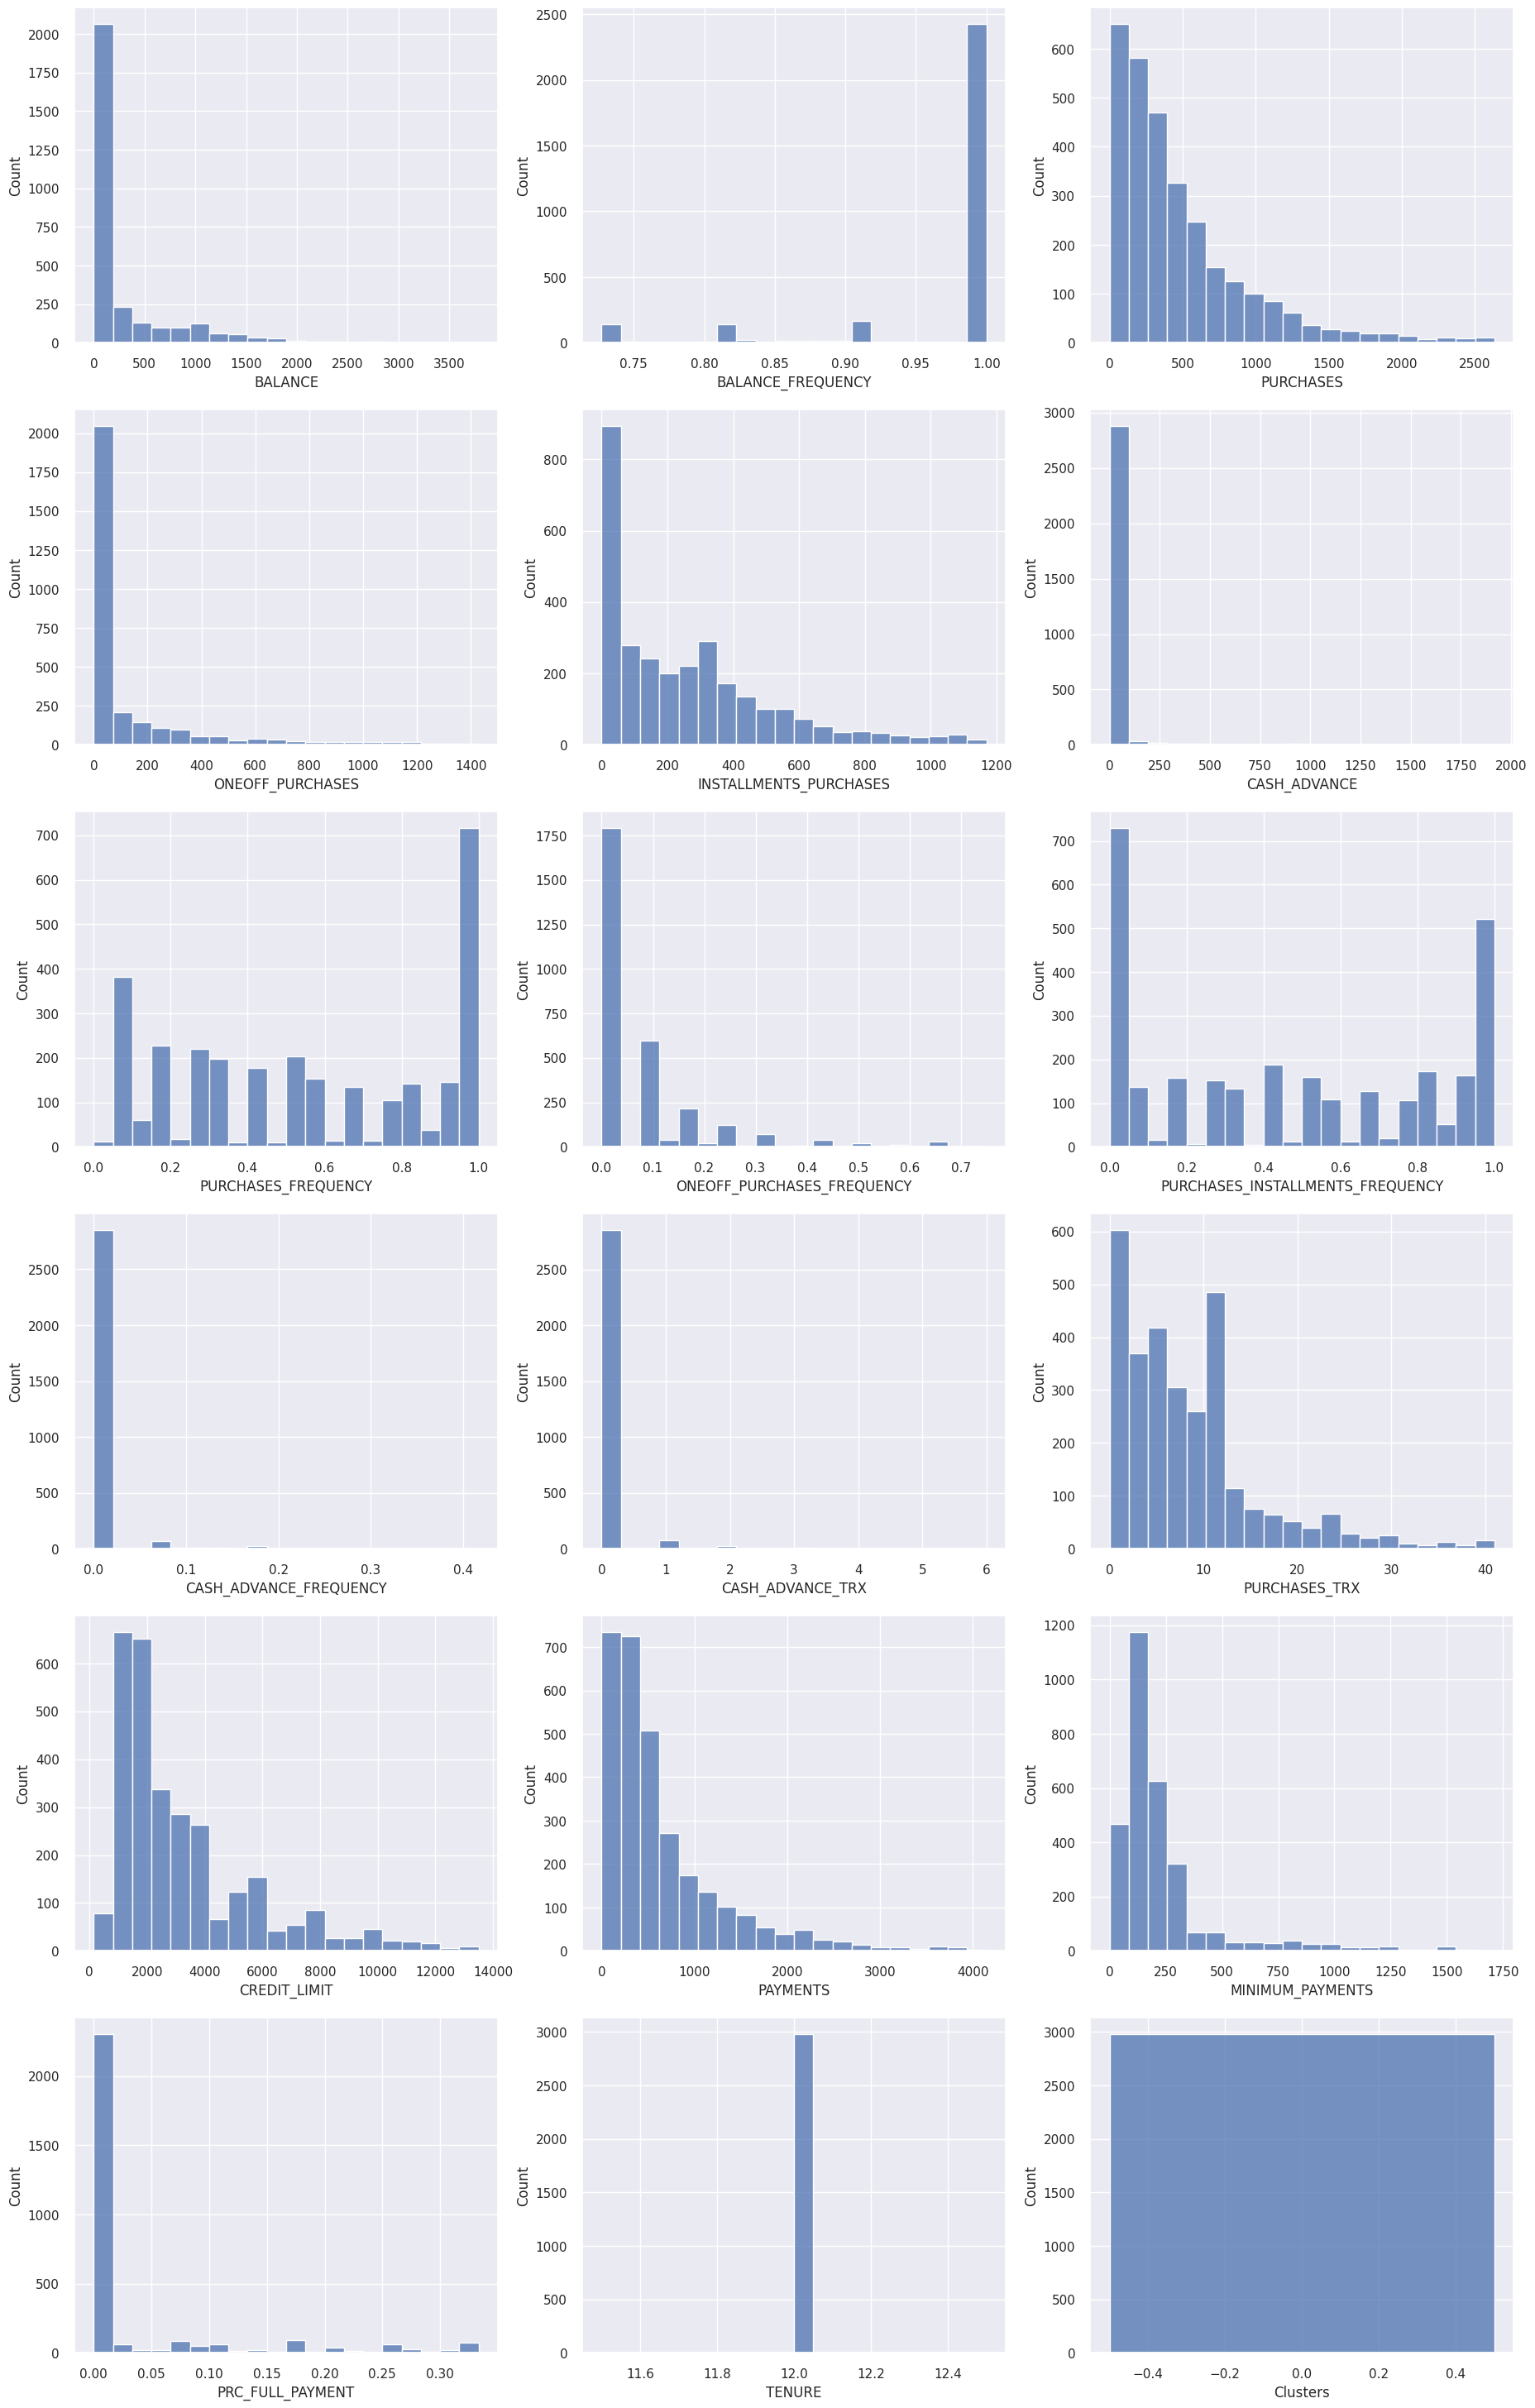

In [ ]:
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):

        ax = plt.subplot(6, 3, i+1)

        sns.histplot( x = col , ax=ax , bins=20 , data = df[df['Clusters'] == 0])

        plt.xlabel(col)

plt.show()